In [2]:
#importing libraries  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
import math
from itertools import product
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [4]:
!pip install statsmodels

the model  implemented does predict future prices, but with a caveat. Here's how it works:

You've trained the ARIMA model on a portion of the data (the training set).
You then iteratively use the model to predict the next data point in the test set. After making each prediction, you append the actual observed value from the test set to the training data and use the updated training data for the next prediction.
In this process, while you are "predicting" the test set, you are actually predicting one step ahead at a time and then using the true observed value to help predict the next step.

In [3]:
# Load the data file
data_path = "ETH-GBP.csv"
data = pd.read_csv(data_path)

# Show the first few rows of the data
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-01-01   97.754478  100.102066   97.467186   98.714050   98.714050   
1  2020-01-02   98.727661   98.727661   96.602150   96.912010   96.912010   
2  2020-01-03   96.912827  102.866142   96.284966  102.573875  102.573875   
3  2020-01-04  102.571434  104.011894  101.709099  103.260132  103.260132   
4  2020-01-05  103.262215  106.521660  103.241982  104.199127  104.199127   

       Volume  
0  5988583431  
1  6109919641  
2  8009516846  
3  5680904209  
4  5755001349

In [4]:
# setting the Index to date

#df = data
#df_id = df.set_index('Date')
#df_id = df_id.fillna(method='ffill')
#df_id.sort_index(inplace=True)
#df_id.index

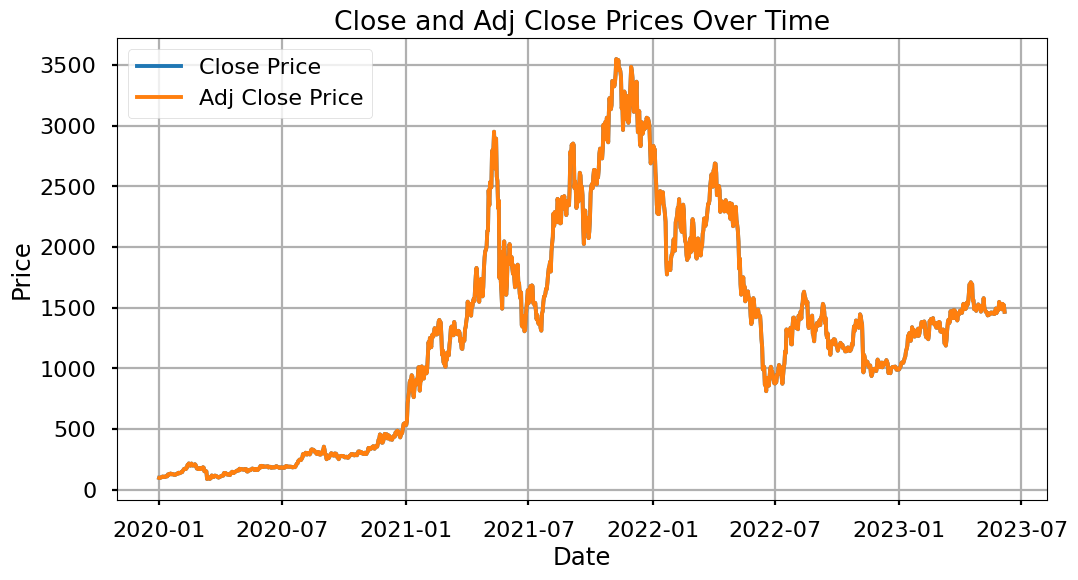

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-01   97.754478  100.102066   97.467186   98.714050   98.714050   
2020-01-02   98.727661   98.727661   96.602150   96.912010   96.912010   
2020-01-03   96.912827  102.866142   96.284966  102.573875  102.573875   
2020-01-04  102.571434  104.011894  101.709099  103.260132  103.260132   
2020-01-05  103.262215  106.521660  103.241982  104.199127  104.199127   

                  Volume  
Date                      
2020-01-01  5.988583e+09  
2020-01-02  6.109920e+09  
2020-01-03  8.009517e+09  
2020-01-04  5.680904e+09  
2020-01-05  5.755001e+09

In [5]:

df = data
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot 'Close' and 'Adj Close' prices
plt.figure(figsize=(12,6))
plt.title('Close and Adj Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Adj Close'], label='Adj Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Resampling to various frequencies
df_daily = df.resample('D').mean()
df_month = df.resample('M').mean()
df_year = df.resample('A-DEC').mean()
df_Q = df.resample('Q-DEC').mean()

df_daily.head()  # Display the first few rows of the daily resampled data for verification


In [6]:
cols = ['Open', 'Low', 'High', 'Volume', 'Adj Close']
df.drop(cols, axis=1, inplace=True)
df.head()

Close
Date                  
2020-01-01   98.714050
2020-01-02   96.912010
2020-01-03  102.573875
2020-01-04  103.260132
2020-01-05  104.199127

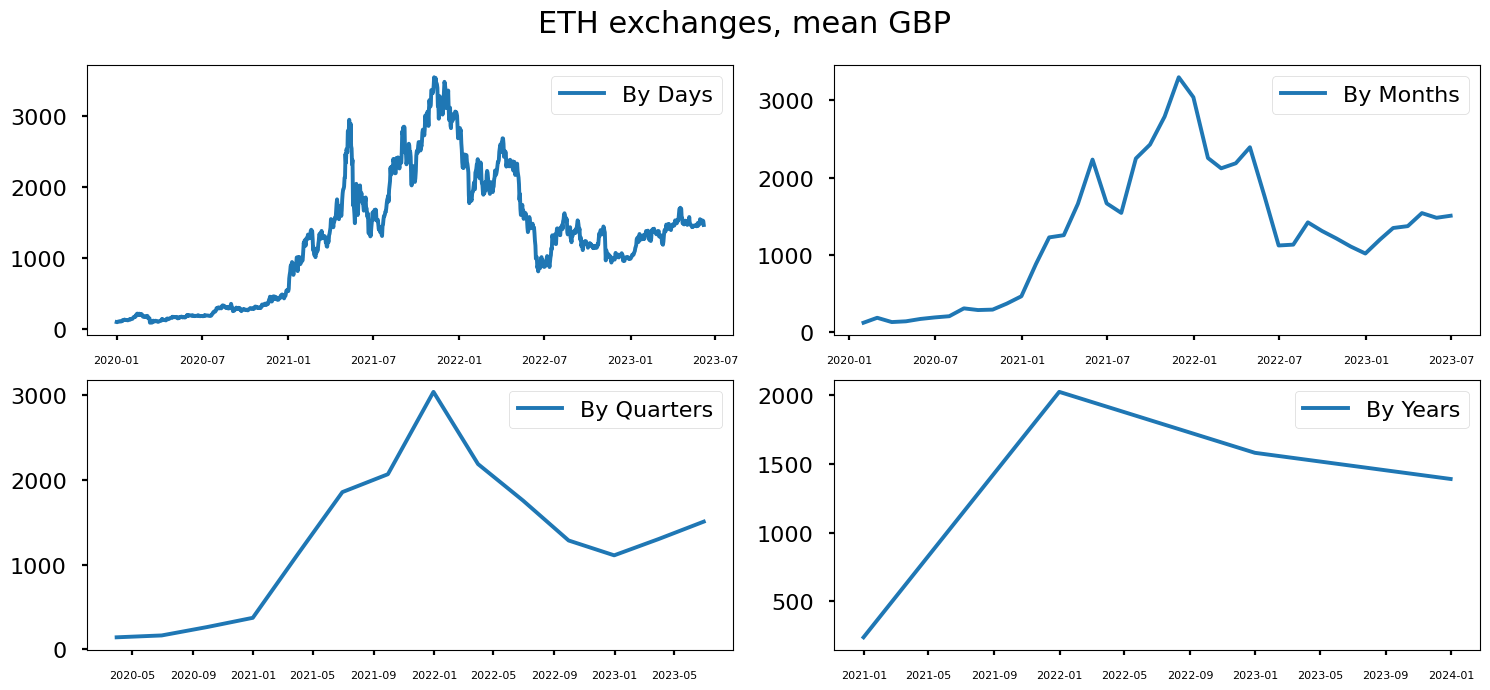

In [7]:
# Adjusting the font size of the x-axis labels and re-plotting
fig = plt.figure(figsize=[15, 7])
plt.suptitle('ETH exchanges, mean GBP', fontsize=22)

plt.subplot(221)
plt.plot(df.Close, '-', label='By Days')
plt.legend()
plt.xticks(fontsize=8)

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()
plt.xticks(fontsize=8)

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()
plt.xticks(fontsize=8)

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()
plt.xticks(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


Dickey–Fuller test: p=0.146364
The series are not stationary


<Figure size 1500x700 with 0 Axes>

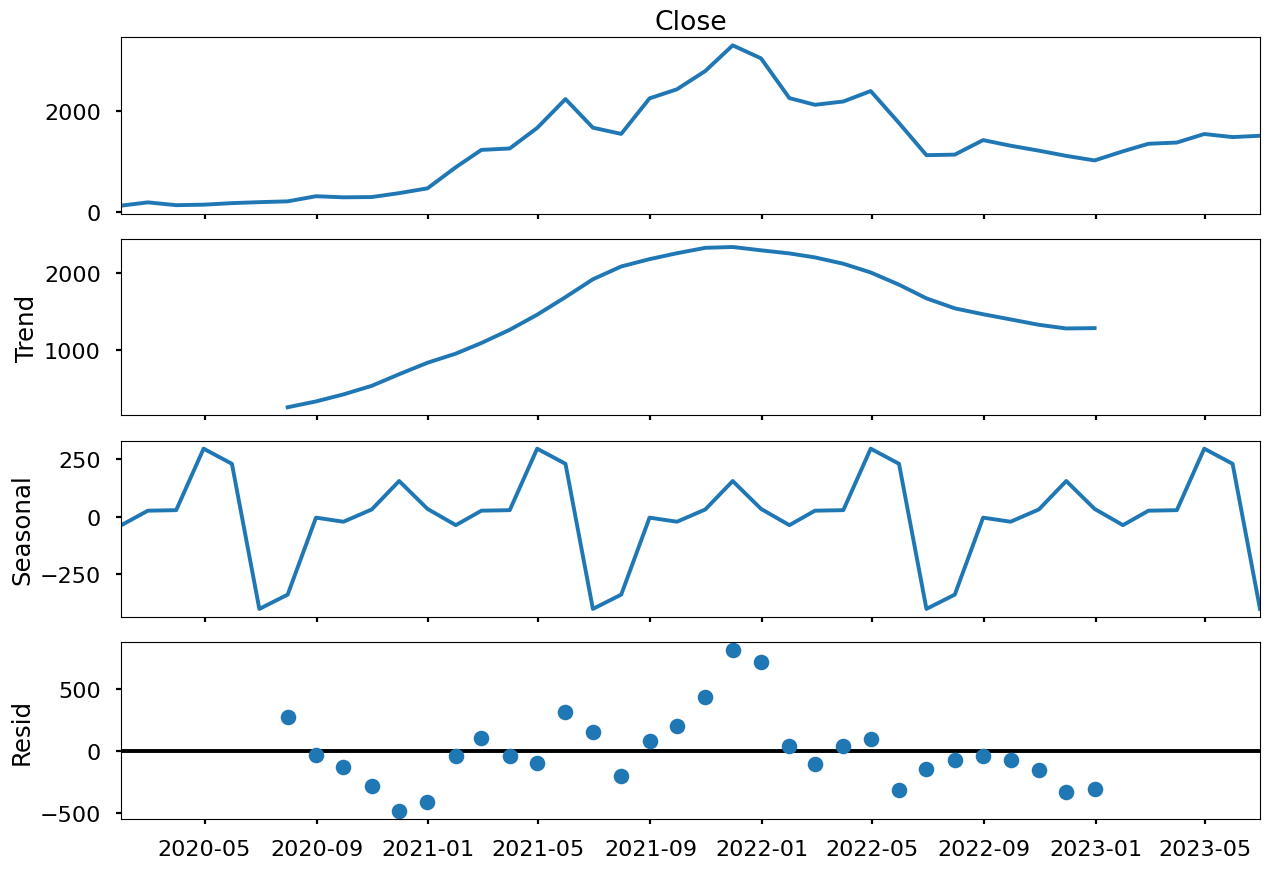

In [8]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])
# used monthly close to calcuate 
if sm.tsa.stattools.adfuller(df_month.Close)[1] > 0.05:
    print('The series are not stationary')
else:
    print('The series are stationary')
plt.show()

In [9]:
# Train test split
#to_row = int(len(data)*0.9)

#training_data = list(data[0:to_row]['Adj Close'])
#testing_data = list(data[to_row:]['Adj Close']) # to row till the end

In [10]:
#plt.figure(figsize=(10,6))
#plt.grid(True)
#plt.xlabel('Dates')
#plt.ylabel('Closing Prices')
#plt.plot(data[0:to_row]['Adj Close'], 'green', label='Train data')
#plt.plot(data[to_row:]['Adj Close'], 'blue', label='Test data')
#plt.legend()

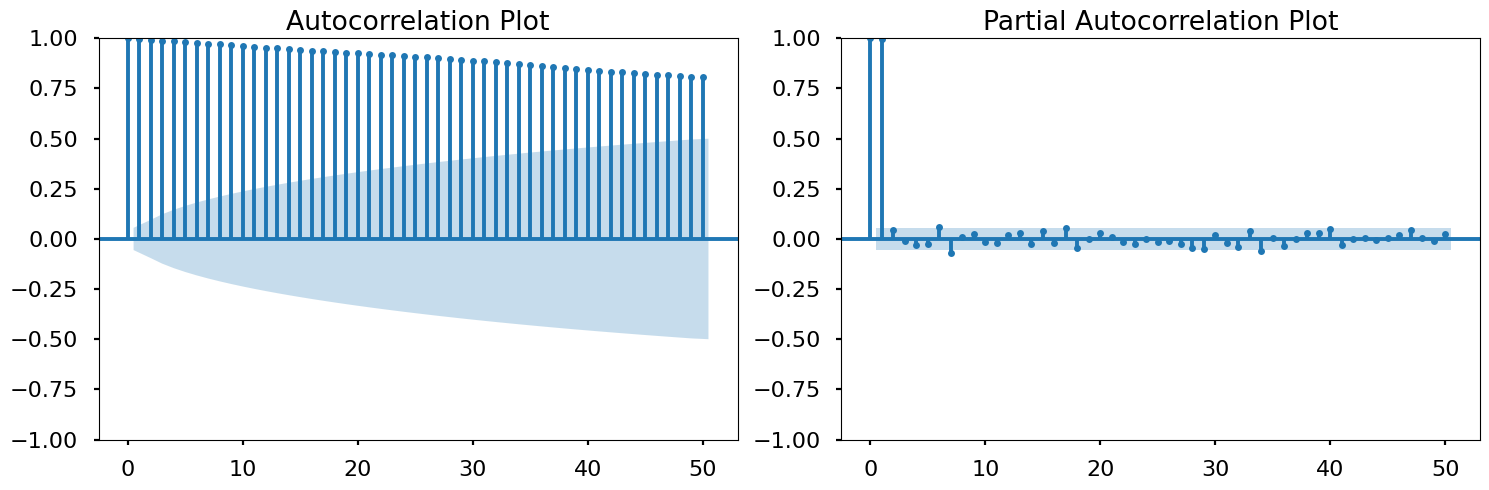

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(data['Close'], lags=50, ax=plt.gca(), title="Autocorrelation Plot")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(data['Close'], lags=50, ax=plt.gca(), title="Partial Autocorrelation Plot")

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 2. Perform ADF test on "Close" column
adf_result = adfuller(data["Close"])

# 3. Extract p-value from the test results
p_value = adf_result[1]

print(f"P-value from ADF Test: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


P-value from ADF Test: 0.40027524616907134
The series is not stationary.


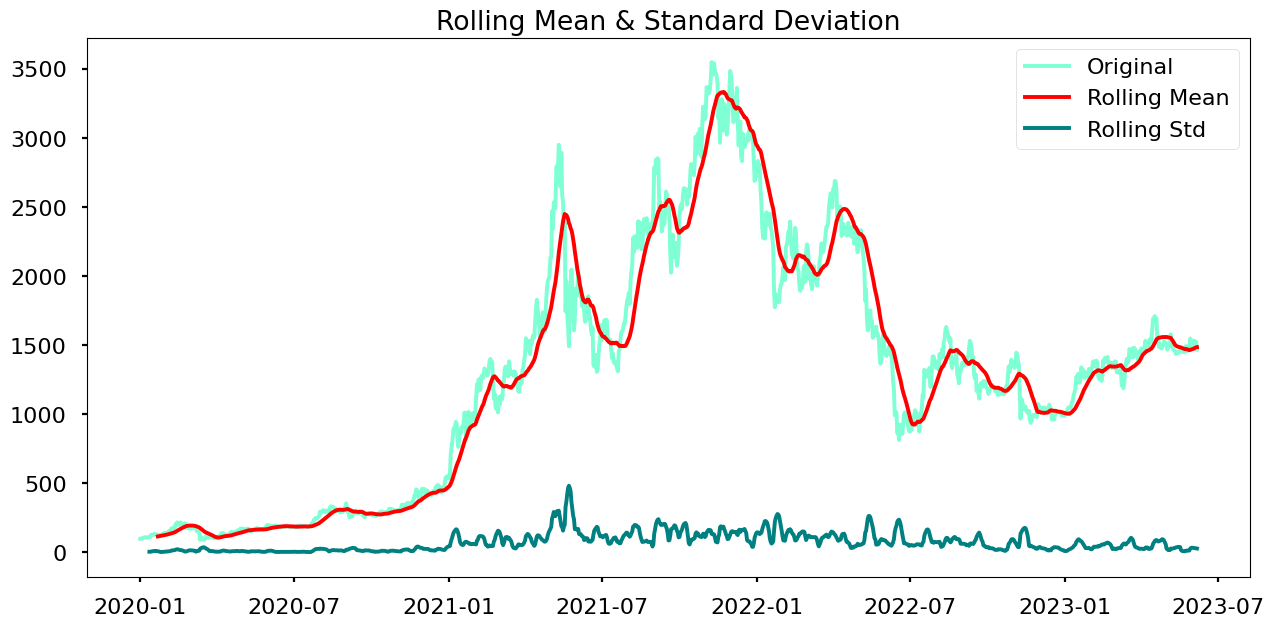

ADF Stastistic: -1.760432
p-value: 0.400275
The graph is non-stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


data_1 = pd.DataFrame(data[['Close']])

def search_stationarity(x):

    # Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(15, 7))
    orig = plt.plot(x, color='aquamarine', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='teal', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey Fuller test    
    result = adfuller(x)
    print('ADF Stastistic: %f' % result[0])
    print('p-value: %f' % result[1])
    pvalue = result[1]
    for key, value in result[4].items():
        if result[0] > value:
            print("The graph is non-stationary")
            break
        else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

# Call the function on the 'Close' column of the data
search_stationarity(data_1['Close'])


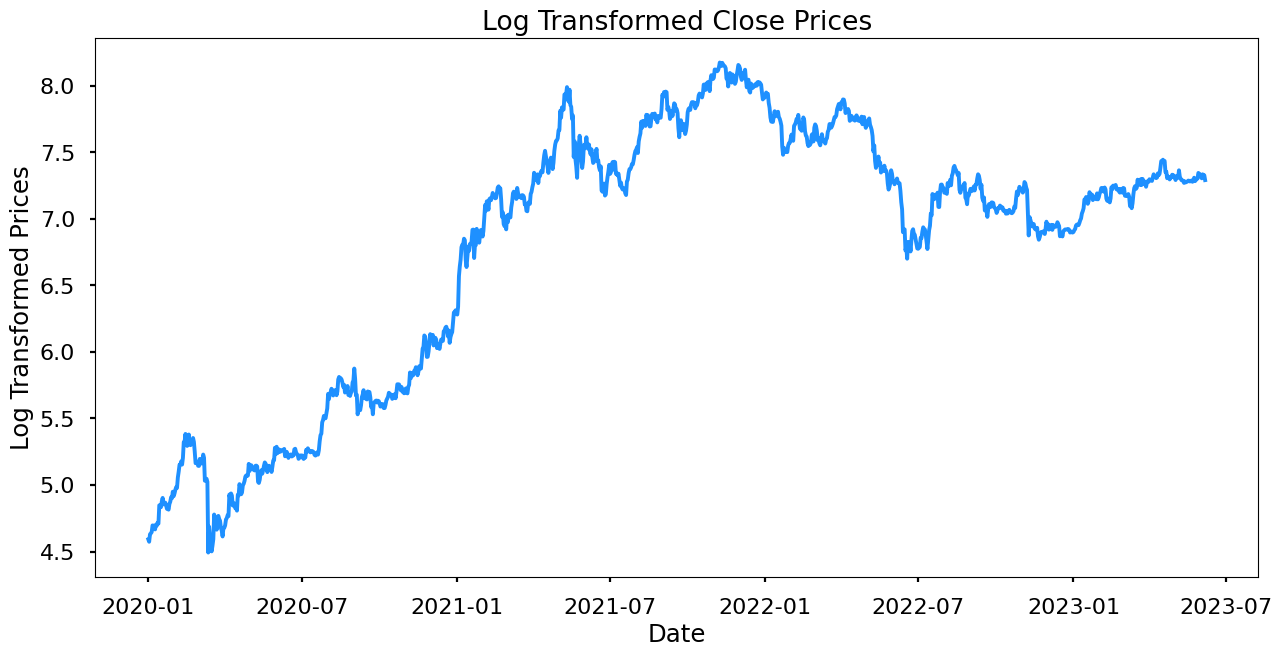

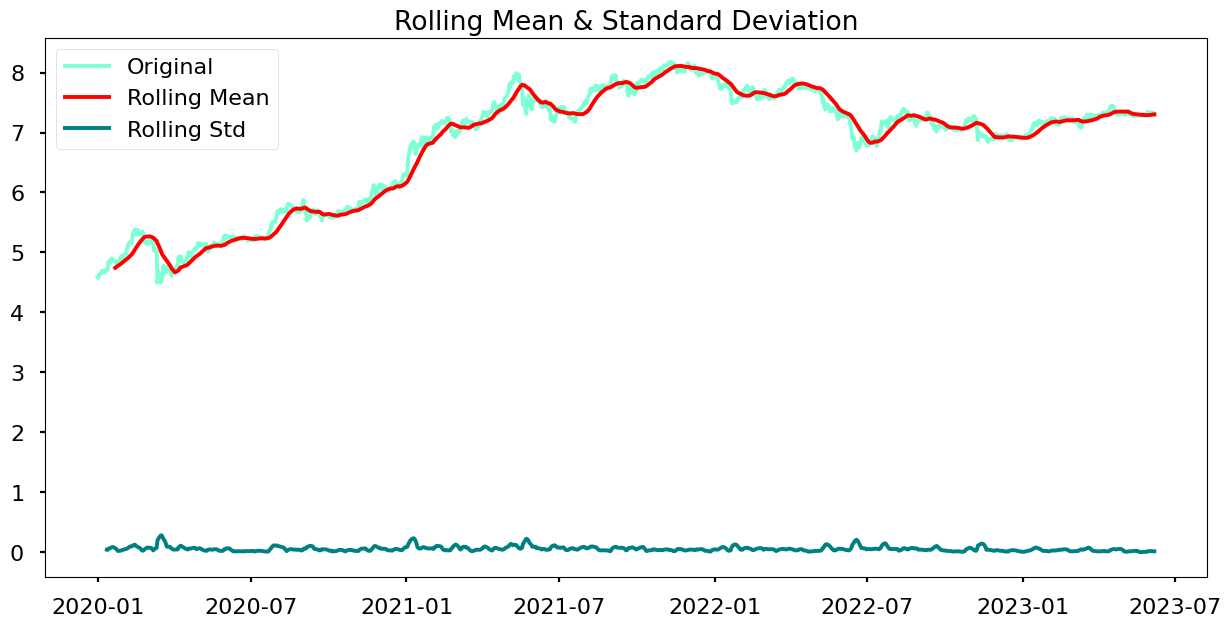

ADF Stastistic: -2.134443
p-value: 0.230892
The graph is non-stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [14]:
import numpy as np

# Log Transforming the series
ts_log = np.log(data_1['Close'])
plt.figure(figsize=(15, 7))
plt.plot(ts_log, color="dodgerblue")
plt.title("Log Transformed Close Prices")
plt.xlabel("Date")
plt.ylabel("Log Transformed Prices")
plt.show()

# Check stationarity of the log transformed series
search_stationarity(ts_log)


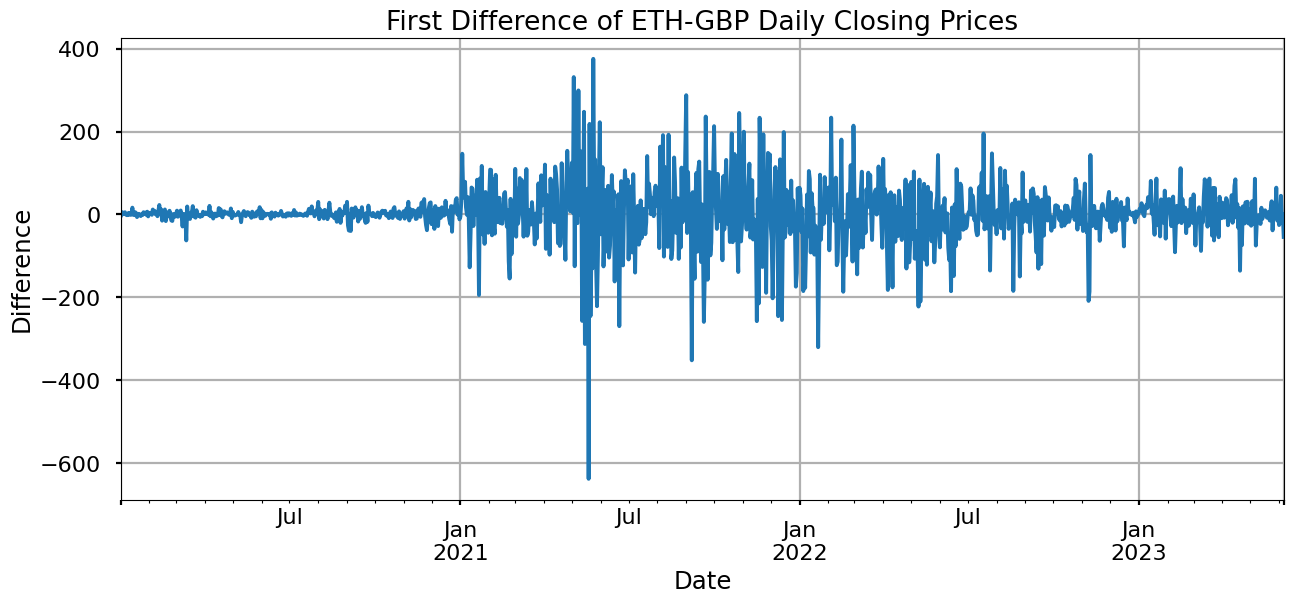

In [15]:

# Calculate first difference of the 'Close' column
data_diff = data['Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(15, 6))
data_diff.plot(title='First Difference of ETH-GBP Daily Closing Prices')
plt.ylabel('Difference')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the differenced data
result_diff = adfuller(data_diff)
adf_statistic_diff, p_value_diff = result_diff[0], result_diff[1]

adf_statistic_diff, p_value_diff


(-13.671445125350841, 1.4571134527049556e-25)

We successfully performed ADF tests on the differencing data. The test results are as follows:

ADF Stats: -13.6714
p-value:
1.457
x
1
0
−
25
1.457×10
−25
 
The ADF statistic is very negative, and the p-value is much less than 0.05, which means that we can reject the null hypothesis (the data has a unit root, that is, not stationary) and accept the alternative hypothesis (the data is stationary).

Therefore, the differenced data is indeed stationary, which lays a solid foundation for us to use the ARIMA model.

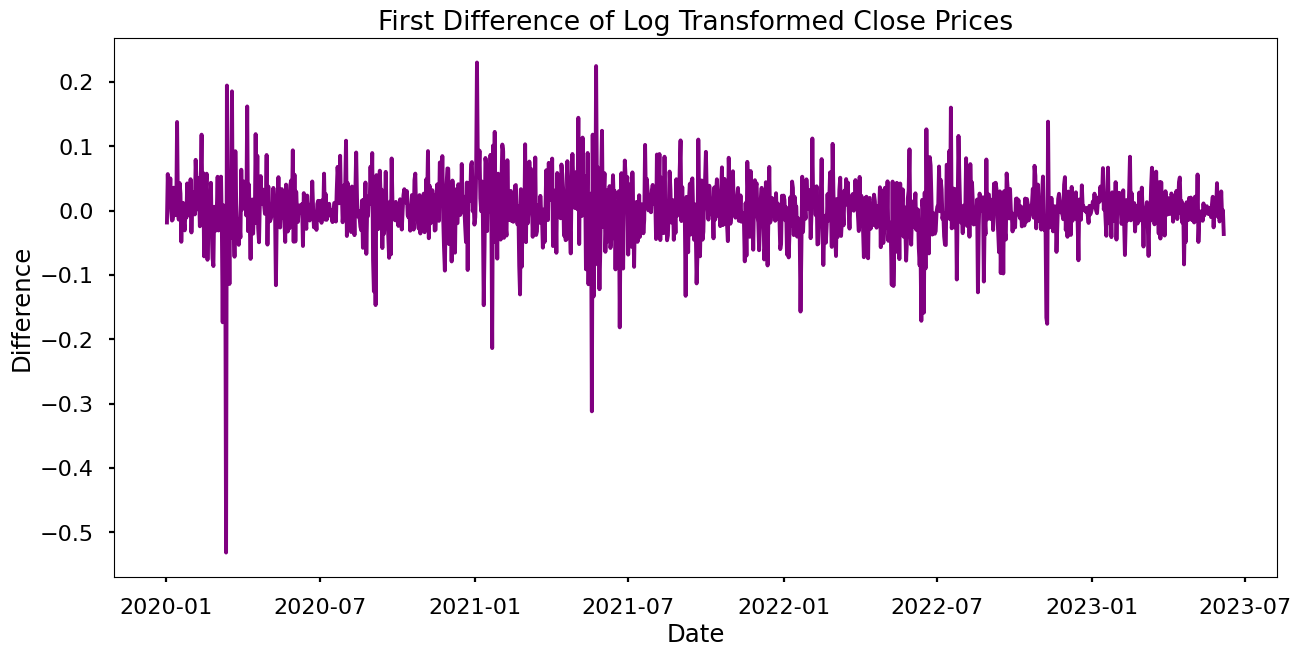

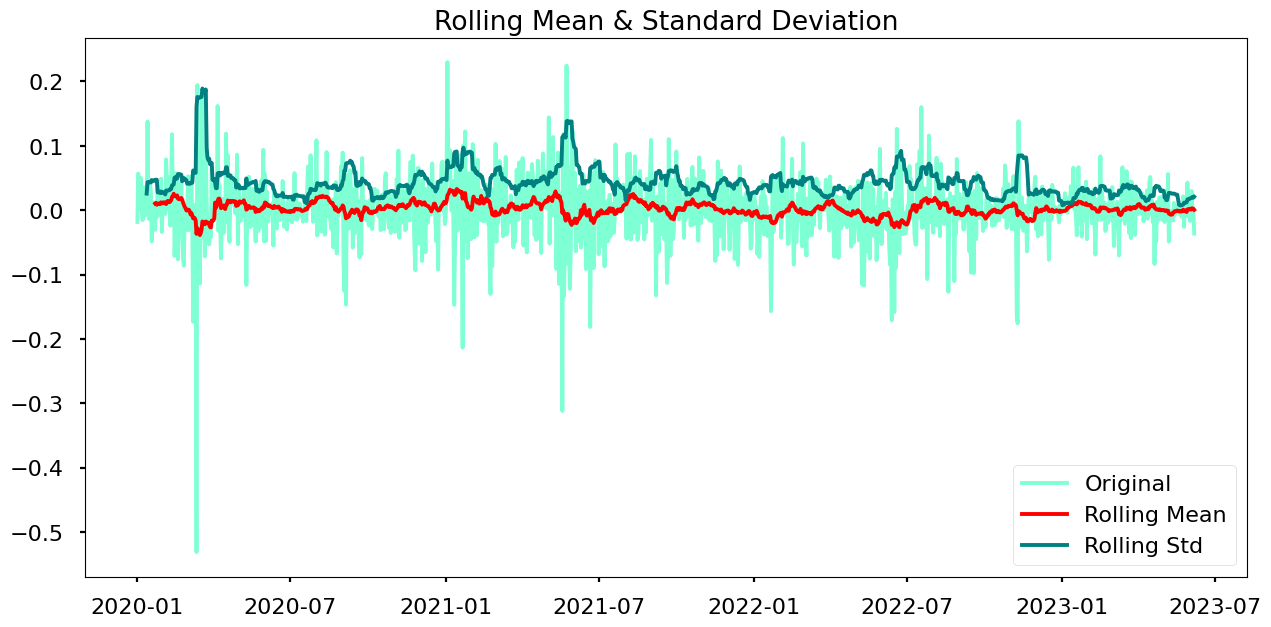

ADF Stastistic: -10.625251
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [17]:
# Applying first difference
ts_log_diff = ts_log.diff().dropna()

# Plotting the difference
plt.figure(figsize=(15, 7))
plt.plot(ts_log_diff, color="purple")
plt.title("First Difference of Log Transformed Close Prices")
plt.xlabel("Date")
plt.ylabel("Difference")
plt.show()

# Check stationarity of the differenced series
search_stationarity(ts_log_diff)


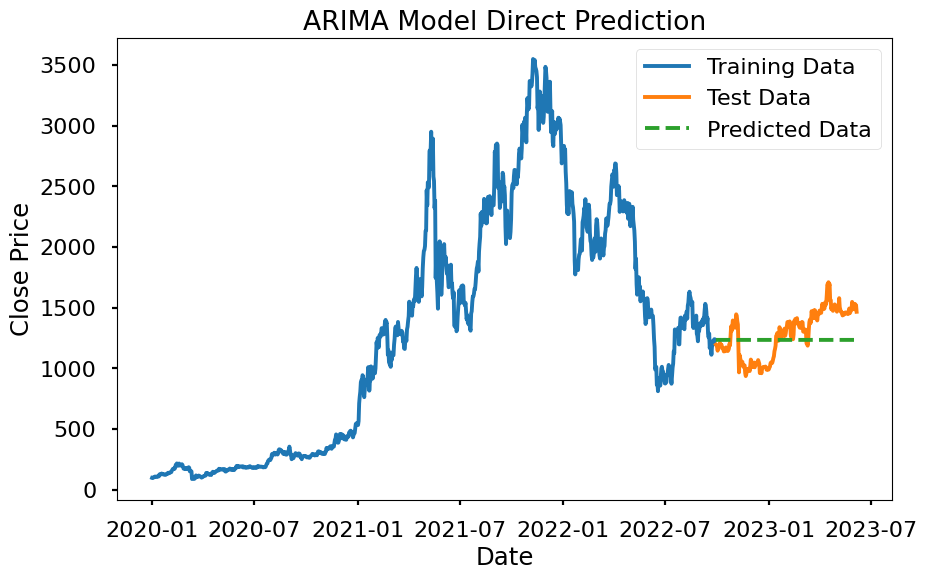

In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming you've already read in your data as 'data_1'
train_size = int(len(data_1) * 0.8)
train, test = data_1[:train_size], data_1[train_size:]

# Train ARIMA model on the training data
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast the entire test set
forecast = model_fit.forecast(steps=len(test))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train.index, train, label='Training Data')
ax.plot(test.index, test, label='Test Data')
ax.plot(test.index, forecast, label='Predicted Data', linestyle='--')
ax.legend()
ax.set_title("ARIMA Model Direct Prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ensure test and forecast are of the same shape
test_values = test.values.ravel()
forecast_values = forecast.ravel()

# Calculate metrics
mse = mean_squared_error(test_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100
r2 = r2_score(test_values, forecast_values)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 39560.30
Root Mean Squared Error (RMSE): 198.90
Mean Absolute Percentage Error (MAPE): 13.77%
R^2 Score: -0.0721


2022-09-29    1235.068852
2022-09-30    1198.002390
2022-10-01    1188.807248
2022-10-02    1177.126547
2022-10-03    1147.822668
Name: Close_forecast, dtype: float64


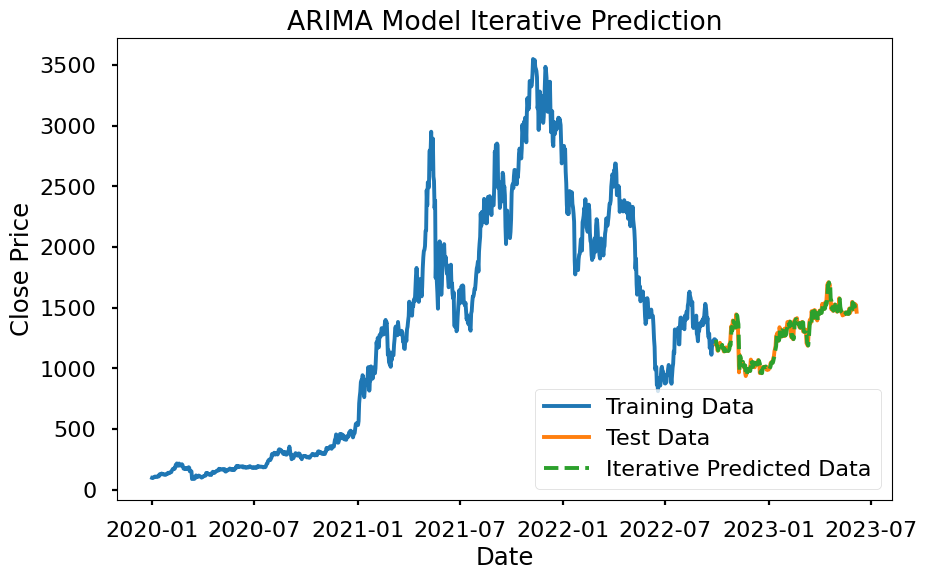

In [20]:
data_1 = pd.DataFrame(data[['Close']])
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Divide the data into training sets and test sets
train_size = int(len(data_1) * 0.8)
train, test = data_1[:train_size], data_1[train_size:]

# Reinitialize lists to store predictions and Reset training data
predictions = []
predicted_dates = []
train, test = data_1[:train_size], data_1[train_size:]


# Iterate over the test data
for date in test.index:
    # Train ARIMA model
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()

    # Forecast the next one point
    forecast = model_fit.forecast(steps=1).values
    predictions.append(forecast[0])
    predicted_dates.append(date)

    # For the next iteration, append the actual observed value from the test data to the training data
    train = train.append(test.loc[date])

forecast_series_Close = pd.Series(predictions, index=predicted_dates)
forecast_series_Close.name = "Close_forecast"
print(forecast_series_Close.head())


# Initial training data for plotting
initial_train = data_1[:train_size]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(initial_train.index, initial_train, label='Training Data')
ax.plot(test.index, test, label='Test Data')
ax.plot(predicted_dates, predictions, label='Iterative Predicted Data', linestyle='--')
ax.legend()
ax.set_title("ARIMA Model Iterative Prediction")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
plt.show()

In [21]:
# Calculate MSE, RMSE and MAPE
from sklearn.metrics import r2_score


r2 = r2_score(test, predictions)

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100

mse, rmse, mape, r2

(1539.7290797544551, 39.239381745313665, 2.079905963865896, 0.9582714577135223)

Loop iterating manually 

### Set a range of values ​​for each ARIMA parameter (p, d, q).
- Use nested loops or itertools.product to generate all possible combinations of arguments.
- For each combination, fit an ARIMA model and calculate the AIC or BIC.
- The parameter with the lowest AIC or BIC is chosen among all combinations.
- Simulated grid search method (method shown later):

### Also set a range of values ​​for each ARIMA parameter.
- Use itertools.product to generate all possible combinations of arguments (this is the same as manually looping iterations).
- For each combination, fit an ARIMA model and calculate the AIC or BIC.
- The parameter with the lowest AIC or BIC is chosen among all combinations.
- In both methods, the core steps and goals are the same: generate all possible combinations for ARIMA parameters and choose the parameter combination with the best performance (lowest AIC/BIC).

In fact, the two methods are functionally identical. 

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Load data
data_1 = pd.DataFrame(data[['Close']])

# Divide the data into training and testing datasets
train_size = int(len(data_1) * 0.8)
training_data_df, testing_data_df = data_1[:train_size], data_1[train_size:]

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Define a function to compute the AIC for a given order of ARIMA
def compute_aic(order, train):
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        return model_fit.aic
    except:
        return np.inf

# Compute AIC for all combinations and find the combination with the lowest AIC
aic_scores = [compute_aic(order, training_data_df['Close']) for order in pdq]
best_order = pdq[np.argmin(aic_scores)]

best_order, min(aic_scores)


((2, 1, 2), 11497.323344904991)

### Traditional Grid Search:
- Typically used for hyperparameter optimization of machine learning models.
- Utilizes grid search functionalities provided by libraries like Scikit-learn.
- Tries out all possible combinations of given parameters.
- For each parameter combination, cross-validation is conducted to evaluate the model's performance.
- Chooses the parameter combination that performs best in cross-validation.
### Parameter Selection Method We Used for ARIMA:
- Specifically designed for time series models, such as ARIMA.
- Due to the sequential and time-dependent nature of time series data, we typically do not employ cross-validation. Instead, we use information criteria, such as AIC or BIC, to evaluate the quality of the model under different parameter combinations.
- We set a range of possible values for each ARIMA parameter and attempt every possible combination.
- For each combination, we fit the model and compute the AIC or BIC.
- We choose the parameter combination with the lowest AIC or BIC.

The goal of both methods is to find the best parameter combination. However, due to the characteristics of time series data, we cannot straightforwardly employ the standard grid search method provided by Scikit-learn for ARIMA parameter selection. Thus, we simulated a similar procedure by iterating through all possible parameter combinations to choose the best one.

In [23]:
from sklearn.metrics import mean_squared_error

# Define the p, d and q parameters for the grid search
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Placeholder for best parameters and lowest AIC
best_params = None
lowest_aic = np.inf

# Grid search for ARIMA parameters
for order in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(training_data_df['Close'], order=order)
        model_fit = model.fit()
        
        # Calculate AIC for the current parameter combination
        current_aic = model_fit.aic
        
        # Update best parameters if current AIC is lower than previous lowest AIC
        if current_aic < lowest_aic:
            best_params = order
            lowest_aic = current_aic
    except:
        continue

best_params, lowest_aic


((2, 1, 2), 11497.323344904991)

data preparation:

Both pieces of code first select the Close column from the original data and split it into training and testing sets.
In the second block of code, the training data is converted to a list, which allows for more efficient processing of the data in the loop. And in the first piece of code, the data is still in DataFrame format.

Model parameters:

The ARIMA model parameters used by the second piece of code are (2,1,2) after optimiazation.
The ARIMA model parameters used by the first piece of code are (1,1,1).

method of prediction:

In the second piece of code, I used a list of training data and updated it each iteration. After prediction, add the actual observations from the test data to this training list.
In the first piece of code, I used the training and test data in DataFrame format and updated the training data after each prediction. This approach may be more inefficient than using lists directly, because DataFrame updates (especially append operations) may be relatively slow.

In [24]:
# Prepare the data
data_1 = pd.DataFrame(data[['Close']])
train_size = int(len(data_1) * 0.8)
training_data_df, testing_data_df = data_1[:train_size], data_1[train_size:]

# Convert training data to a list for efficiency
training_data = training_data_df.values.flatten().tolist()


# Adjusting variable names for the 212 model and executing the predictions
training_data_212 = training_data_df.values.flatten().tolist()
predictions_212 = []
predicted_dates_212 = []

for date in testing_data_df.index:
    model_212 = ARIMA(training_data_212, order=(2,1,2))
    model_fit_212 = model_212.fit()
    
    # Forecast the next point
    output_212 = model_fit_212.forecast()
    yhat_212 = output_212[0]
    predictions_212.append(yhat_212)
    predicted_dates_212.append(date)
    
    # Append the actual observed value from the test data to the training data
    actual_test_value_212 = testing_data_df.loc[date].values[0]
    training_data_212.append(actual_test_value_212)

# Convert predictions to a series for easier visualization or evaluation
forecast_series_Close_212 = pd.Series(predictions_212, index=predicted_dates_212)
forecast_series_Close_212.name = "Close_forecast_212"

forecast_series_Close.head()



2022-09-29    1235.068852
2022-09-30    1198.002390
2022-10-01    1188.807248
2022-10-02    1177.126547
2022-10-03    1147.822668
Name: Close_forecast, dtype: float64

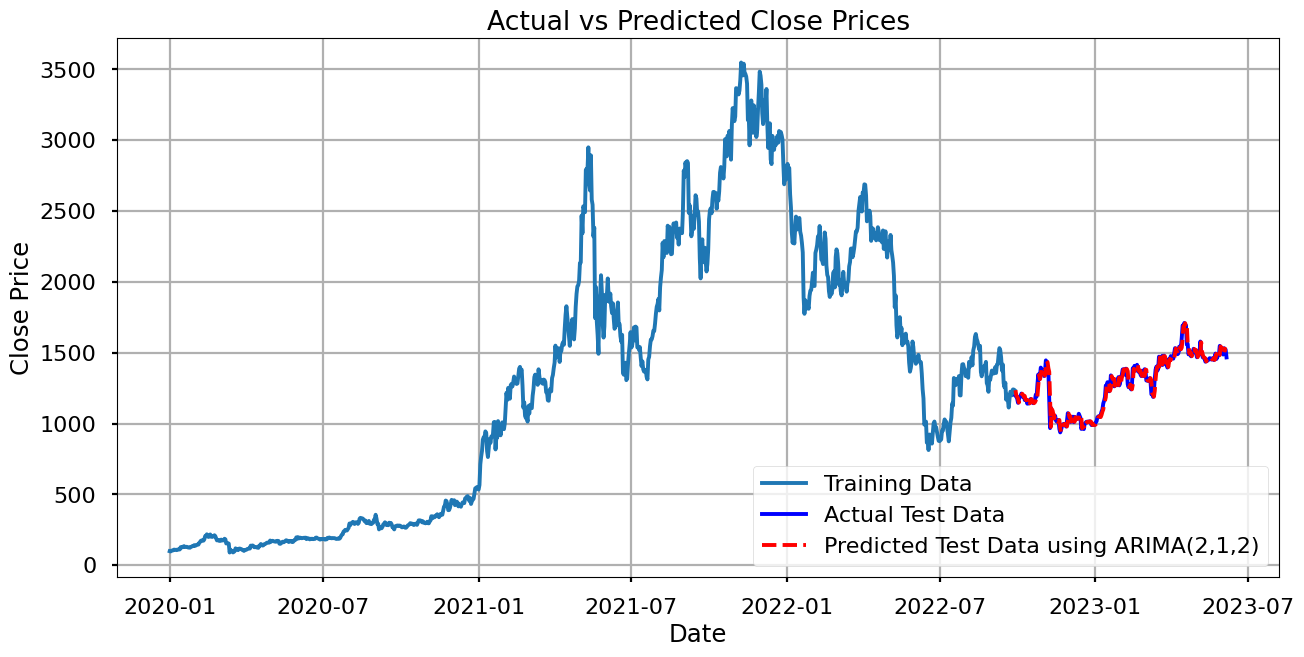

In [25]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(training_data_df.index, training_data_df['Close'], label='Training Data')
plt.plot(testing_data_df.index, testing_data_df['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates, predictions, color='red', linestyle='--', label='Predicted Test Data using ARIMA(2,1,2)')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


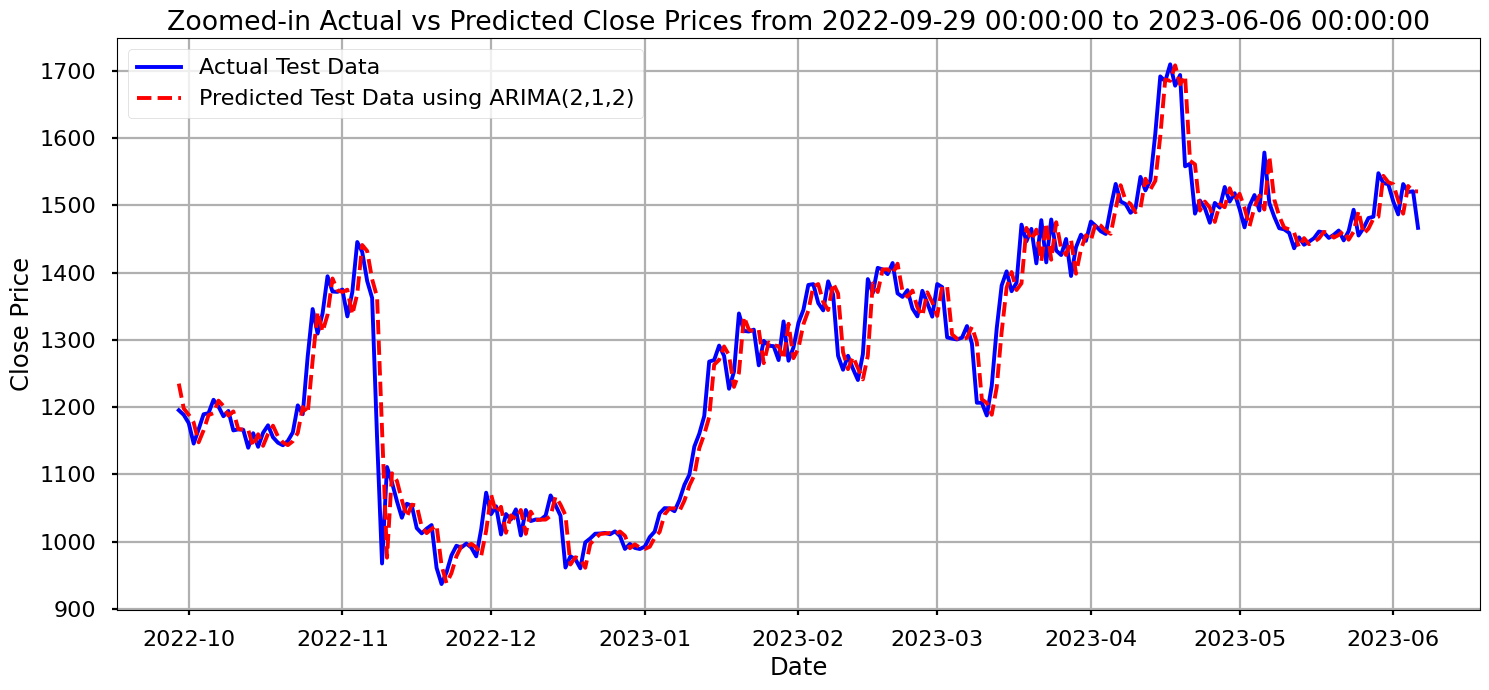

In [26]:
# Zooming in on the predicted portion for a clearer view
start_point = testing_data_df.index[0]
end_point = testing_data_df.index[-1]

plt.figure(figsize=(15, 7))
plt.plot(testing_data_df.index, testing_data_df['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates, predictions, color='red', linestyle='--', label='Predicted Test Data using ARIMA(2,1,2)')
plt.title(f'Zoomed-in Actual vs Predicted Close Prices from {start_point} to {end_point}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


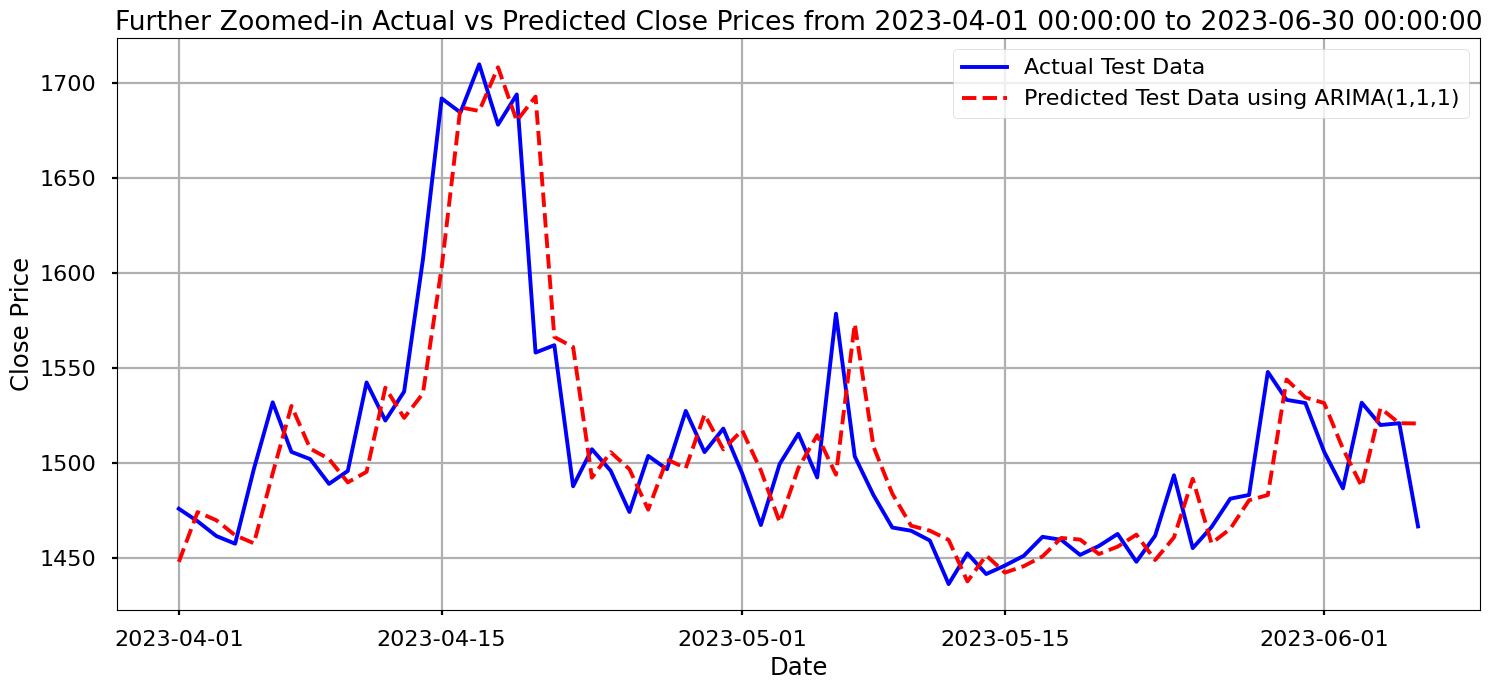

In [27]:
# Setting the desired zoom-in range for April to June 2023
start_point_zoom_further = pd.Timestamp("2023-04-01")
end_point_zoom_further = pd.Timestamp("2023-06-30")

# Further zoomed in view for the desired range
plt.figure(figsize=(15, 7))
plt.plot(testing_data_df[start_point_zoom_further:end_point_zoom_further].index, testing_data_df['Close'][start_point_zoom_further:end_point_zoom_further], color='blue', label='Actual Test Data')
plt.plot(forecast_series_Close[start_point_zoom_further:end_point_zoom_further].index, forecast_series_Close[start_point_zoom_further:end_point_zoom_further], color='red', linestyle='--', label='Predicted Test Data using ARIMA(1,1,1)')
plt.title(f'Further Zoomed-in Actual vs Predicted Close Prices from {start_point_zoom_further} to {end_point_zoom_further}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Calculate MSE, RMSE, R^2 value and MAPE for the 212 model 
r2_212 = r2_score(testing_data_df, predictions_212)
mse_212 = mean_squared_error(testing_data_df, predictions_212)
rmse_212 = np.sqrt(mse_212)
mape_212 = np.mean(np.abs((testing_data_df['Close'] - predictions_212) / testing_data_df['Close'])) * 100

mse_212, rmse_212, mape_212, r2_212

(1556.5873857748397, 39.453610554356615, 2.125264574829323, 0.9578145769902185)

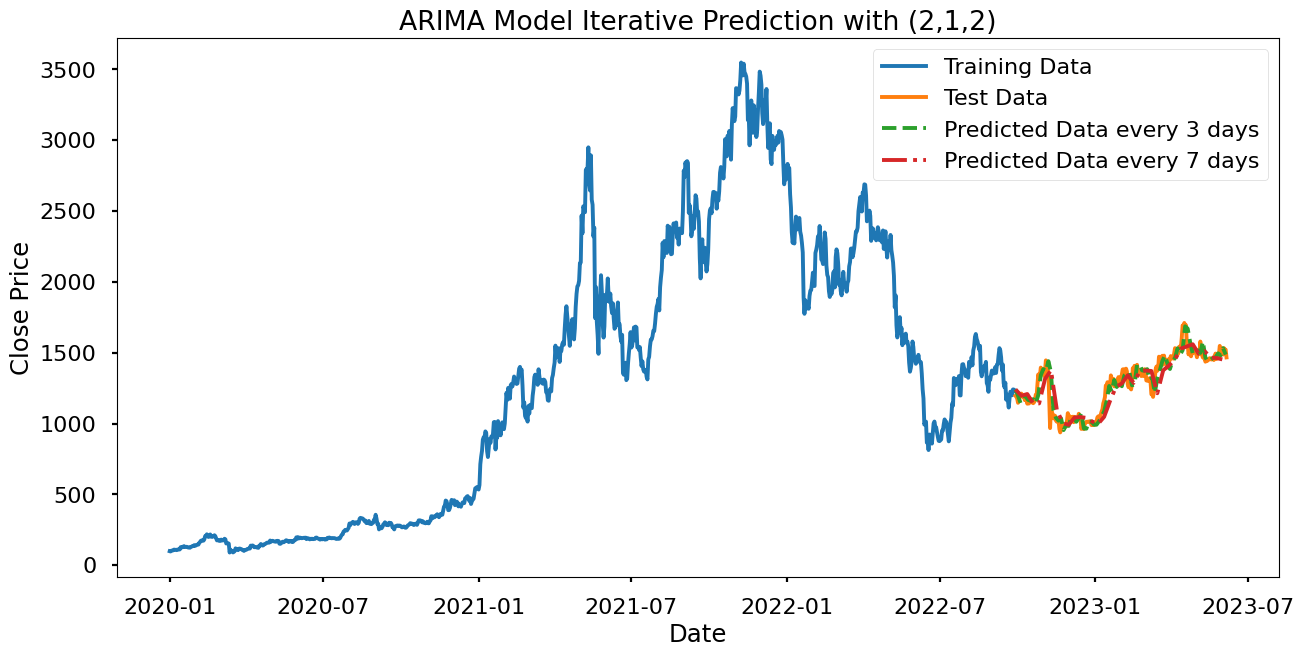

In [29]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load data
data_path = "ETH-GBP.csv"
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

data_1 = pd.DataFrame(data[['Close']])

# Divide the data into training sets and test sets
train_size = int(len(data_1) * 0.8)
train, test = data_1[:train_size], data_1[train_size:]

def perform_rolling_forecast(train, test, step_size, order=(2,1,2)):
    predictions = []
    predicted_dates = []

    # Iterate over the test data every "step_size" days
    for idx, date in enumerate(test.index[::step_size]):
        # Train ARIMA model
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Forecast the next point
        forecast = model_fit.forecast(steps=1).values
        predictions.append(forecast[0])
        predicted_dates.append(date)

        # Append the actual observed values from the test data (till the predicted date) to the training data
        train = train.append(test.iloc[:idx * step_size + 1])

    return predictions, predicted_dates

# Forecast every 3 days
predictions_3days, predicted_dates_3days = perform_rolling_forecast(train.copy(), test, 3)
forecast_series_3days = pd.Series(predictions_3days, index=predicted_dates_3days)
forecast_series_3days.name = "Close_forecast_3days"

# Forecast every 7 days
predictions_7days, predicted_dates_7days = perform_rolling_forecast(train.copy(), test, 7)
forecast_series_7days = pd.Series(predictions_7days, index=predicted_dates_7days)
forecast_series_7days.name = "Close_forecast_7days"

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_series_3days, label='Predicted Data every 3 days', linestyle='--')
plt.plot(forecast_series_7days, label='Predicted Data every 7 days', linestyle='-.')
plt.legend()
plt.title("ARIMA Model Iterative Prediction with (2,1,2)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


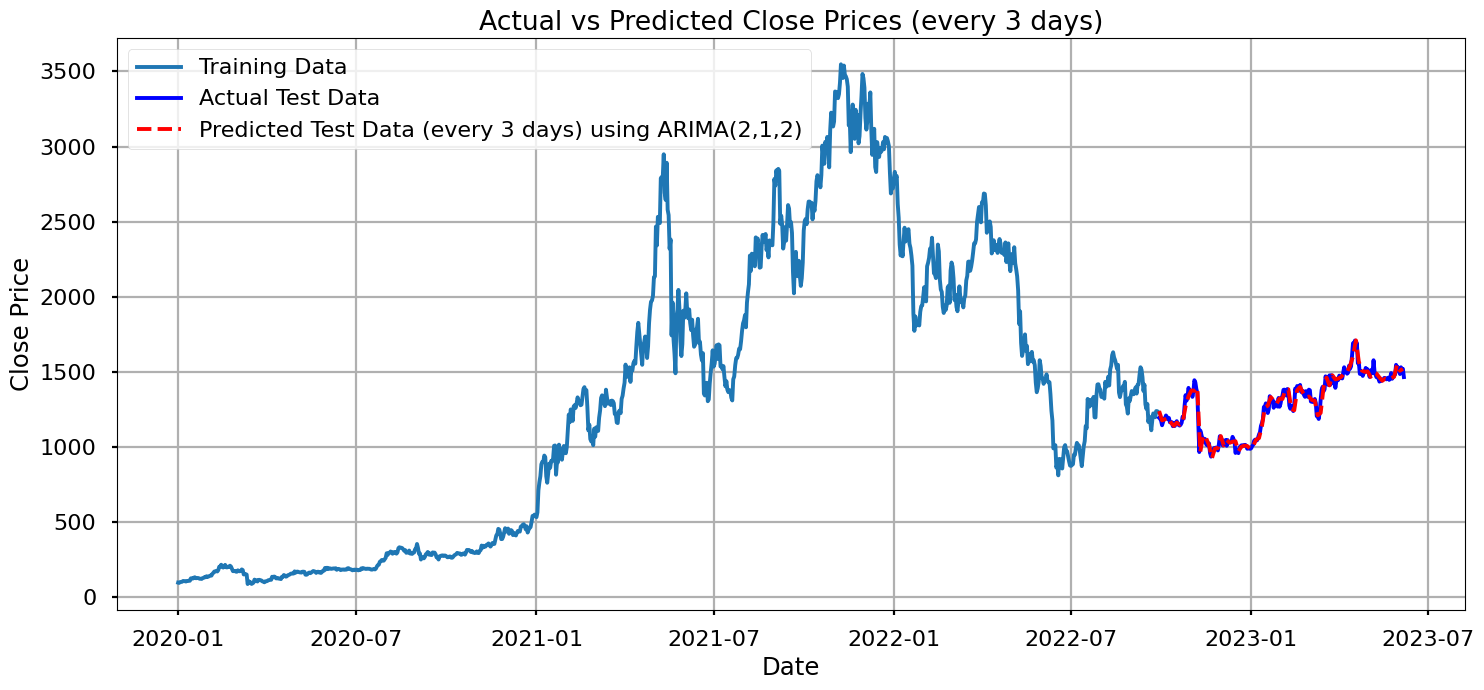

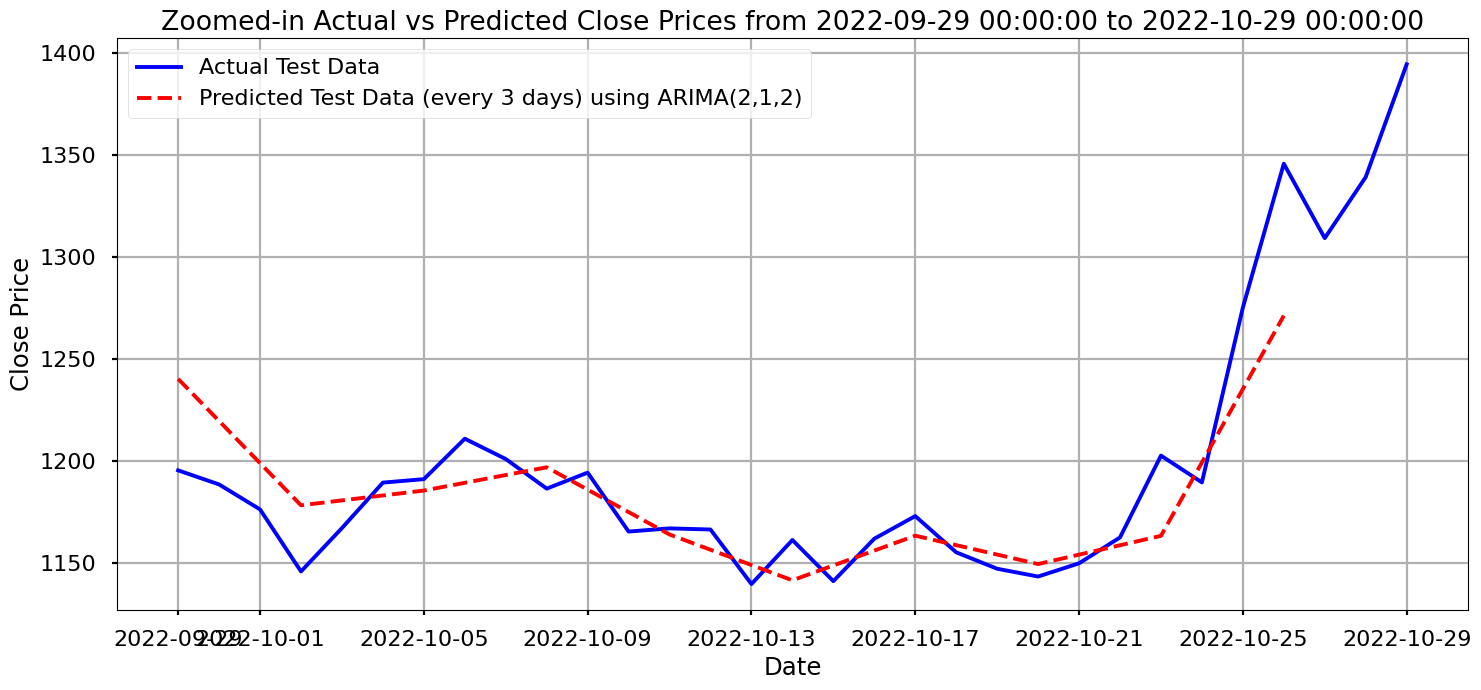

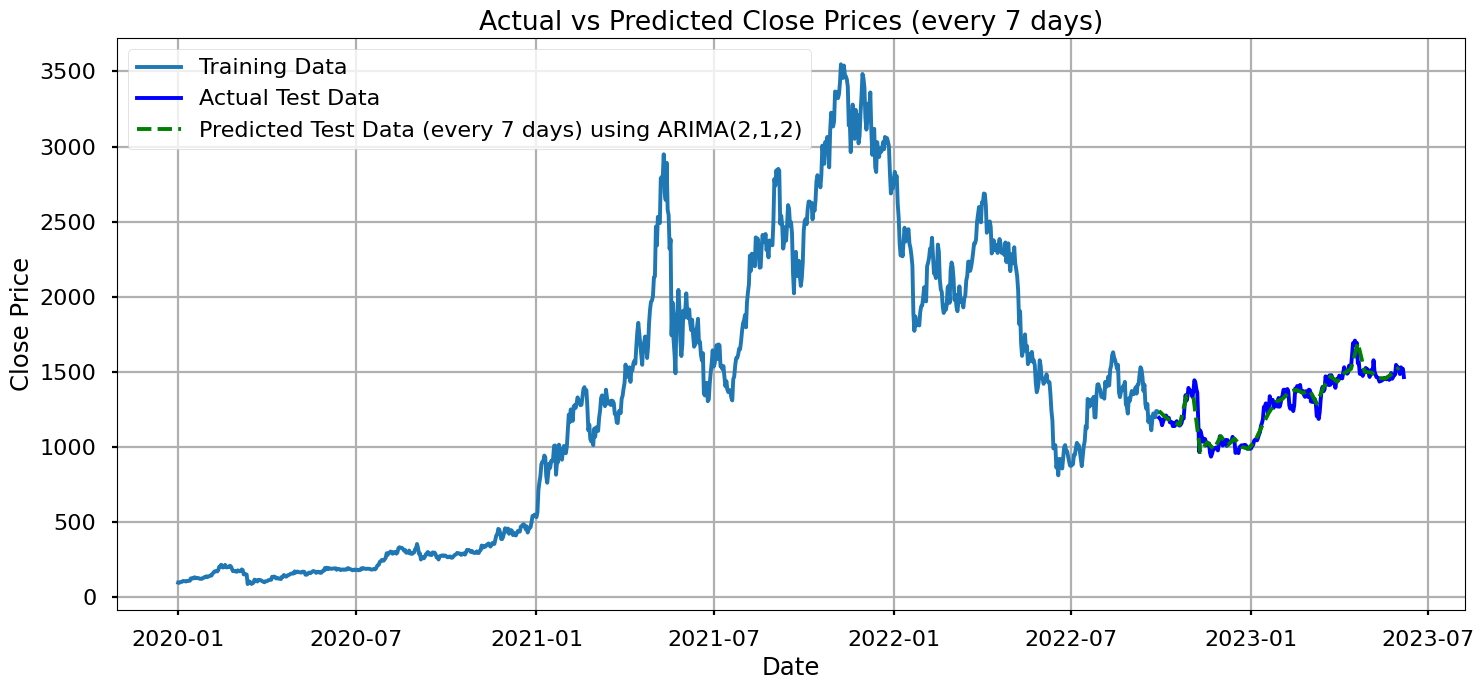

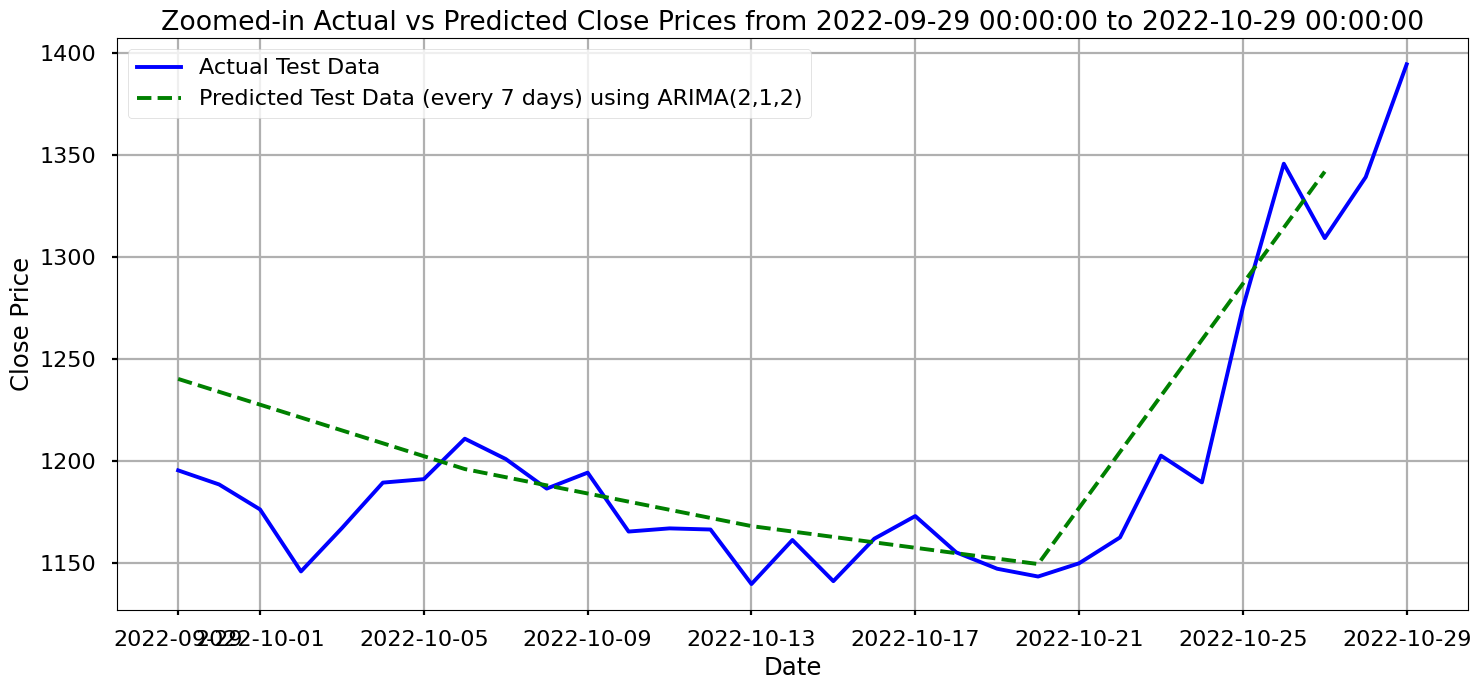

In [30]:
# Function to perform rolling forecast
def rolling_forecast(train, test, order, skip_days):
    predictions = []
    predicted_dates = []
    
    for i in range(0, len(test), skip_days):
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        # Forecast the next point
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        predicted_dates.append(test.index[i])
        
        # Append the actual observed values from the test data to the training data
        # Incorporate the data from the skipped days into the training set as well
        train = train.append(test.iloc[i:i+skip_days])
    
    return predictions, predicted_dates

# Perform predictions for every 3 days
predictions_3days, predicted_dates_3days = rolling_forecast(train, test, (2,1,2), 3)

# Perform predictions for every 7 days
predictions_7days, predicted_dates_7days = rolling_forecast(train, test, (2,1,2), 7)

# Plotting for every 3 days
plt.figure(figsize=(15, 7))
plt.plot(training_data_df.index, training_data_df['Close'], label='Training Data')
plt.plot(testing_data_df.index, testing_data_df['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_3days, predictions_3days, color='red', linestyle='--', label='Predicted Test Data (every 3 days) using ARIMA(2,1,2)')
plt.title('Actual vs Predicted Close Prices (every 3 days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed in view for 3 days prediction
start_point_zoom = testing_data_df.index[0]
end_point_zoom = testing_data_df.index[30]  # approximately one month

plt.figure(figsize=(15, 7))
plt.plot(testing_data_df[start_point_zoom:end_point_zoom].index, testing_data_df['Close'][start_point_zoom:end_point_zoom], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_3days[:10], predictions_3days[:10], color='red', linestyle='--', label='Predicted Test Data (every 3 days) using ARIMA(2,1,2)')
plt.title(f'Zoomed-in Actual vs Predicted Close Prices from {start_point_zoom} to {end_point_zoom}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting for every 7 days
plt.figure(figsize=(15, 7))
plt.plot(training_data_df.index, training_data_df['Close'], label='Training Data')
plt.plot(testing_data_df.index, testing_data_df['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_7days, predictions_7days, color='green', linestyle='--', label='Predicted Test Data (every 7 days) using ARIMA(2,1,2)')
plt.title('Actual vs Predicted Close Prices (every 7 days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed in view for 7 days prediction
plt.figure(figsize=(15, 7))
plt.plot(testing_data_df[start_point_zoom:end_point_zoom].index, testing_data_df['Close'][start_point_zoom:end_point_zoom], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_7days[:5], predictions_7days[:5], color='green', linestyle='--', label='Predicted Test Data (every 7 days) using ARIMA(2,1,2)')
plt.title(f'Zoomed-in Actual vs Predicted Close Prices from {start_point_zoom} to {end_point_zoom}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error

# Calculate MSE, RMSE, and MAPE for the 3 days predictions
mse_3days = mean_squared_error(test['Close'][::3].head(len(predictions_3days)), predictions_3days)
rmse_3days = np.sqrt(mse_3days)
mape_3days = np.mean(np.abs((test['Close'][::3].head(len(predictions_3days)) - predictions_3days) / test['Close'][::3].head(len(predictions_3days)))) * 100
r2_3days = r2_score(test['Close'][::3].head(len(predictions_3days)), predictions_3days)

# Calculate MSE, RMSE, and MAPE for the 7 days predictions
mse_7days = mean_squared_error(test['Close'][::7].head(len(predictions_7days)), predictions_7days)
rmse_7days = np.sqrt(mse_7days)
mape_7days = np.mean(np.abs((test['Close'][::7].head(len(predictions_7days)) - predictions_7days) / test['Close'][::7].head(len(predictions_7days)))) * 100
r2_7days = r2_score(test['Close'][::7].head(len(predictions_7days)), predictions_7days)

mse_3days, rmse_3days, mape_3days, mse_7days, rmse_7days, mape_7days, r2_3days, r2_7days


(1375.0672511396676,
 37.081899238572824,
 2.138874340352123,
 2046.4603799430176,
 45.23782023863459,
 2.4333357981134234,
 0.9636161559846455,
 0.9375853412758784)

In [32]:
# Checking the columns in the df dataframe
data.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1002
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -5747.558
Date:                Sun, 27 Aug 2023   AIC                          11505.116
Time:                        16:32:46   BIC                          11529.655
Sample:                    01-01-2020   HQIC                         11514.443
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0448      0.709     -1.473      0.141      -2.435       0.345
ar.L2         -0.0620      0.055     -1.130      0.258      -0.169       0.045
ma.L1         -0.0185      0.712     -0.026      0.979      -1.415       1.378
ma.L2         -0.9814      0.717     -1.368      0.171      -2.387       0.425
sigma2      5712.2054    619.252      9.224      0.000    4498.494    6925.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2925.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              64.87   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Load the merged ETH-Gold data
merged_data = pd.read_csv("final_merged_eth_gold_global_data_v1.csv")

# Convert the 'Date' column to datetime format and set it as the index
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

# Display the first few rows of the data
merged_data.head()


Close  Close_gold  Volume_gold  Unnamed: 0        Open  \
Date                                                                      
2020-01-01   98.714050      1528.1       270.55           0   97.754478   
2020-01-02   96.912010      1528.1       270.55           1   98.727661   
2020-01-03  102.573875      1552.4       436.74           2   96.912827   
2020-01-04  103.260132      1552.4       436.74           3  102.571434   
2020-01-05  104.199127      1552.4       436.74           4  103.262215   

                  High         Low  Close_global   Adj Close      Volume  ...  \
Date                                                                      ...   
2020-01-01  100.102066   97.467186     98.714050   98.714050  5988583431  ...   
2020-01-02   98.727661   96.602150     96.912010   96.912010  6109919641  ...   
2020-01-03  102.866142   96.284966    102.573875  102.573875  8009516846  ...   
2020-01-04  104.011894  101.709099    103.260132  103.260132  5680904209  ...   
2020-01-05  106.521660  103.241982    104.199127  104.199127  5755001349  ...   

                   GC=F        ^BSESN          ^DJI        ^FTSE        ^GSPC  \
Date                                                                            
2020-01-01          NaN           NaN           NaN          NaN          NaN   
2020-01-02  1524.500000  41626.640625  28868.800781  7604.299805  3257.850098   
2020-01-03  1549.199951  41464.609375  28634.880859  7622.399902  3234.850098   
2020-01-04          NaN           NaN           NaN          NaN          NaN   
2020-01-05          NaN           NaN           NaN          NaN          NaN   

                  ^IXIC        ^N100  ^N225         ^NSEI          ^NYA  
Date                                                                     
2020-01-01          NaN          NaN    NaN  12182.500000           NaN  
2020-01-02  9092.190430  1158.260010    NaN  12282.200195  14002.490234  
2020-01-03  9020.769531  1157.380005    NaN  12226.650391  13917.049805  
2020-01-04          NaN          NaN    NaN           NaN           NaN  
2020-01-05          NaN          NaN    NaN           NaN           NaN  

[5 rows x 22 columns]

## GOLD FEATURE in ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into training and testing sets (80-20 split)
split_point = int(0.8 * len(merged_data))
train_arimax = merged_data[:split_point]
test_arimax = merged_data[split_point:]

# Checking the shape of the training and testing datasets
train_arimax.shape, test_arimax.shape


# Redefine the model and forecast using 'Close_gold' as the exogenous variable
model_arimax = ARIMA(train_arimax['Close'], order=(2,1,2), exog=train_arimax[['Close_gold']])
model_fit_arimax = model_arimax.fit()

# Forecasting
forecast_arimax = model_fit_arimax.forecast(steps=len(test_arimax), exog=test_arimax[['Close_gold']])

# Extract the predicted values and dates for visualization
predicted_values_arimax = forecast_arimax.values
predicted_dates_arimax = test_arimax.index

predicted_values_arimax[:5], predicted_dates_arimax[:5]


(array([1240.56754696, 1238.46665276, 1234.3628082 , 1238.24267455,
        1241.5516538 ]),
 DatetimeIndex(['2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
                '2022-10-03'],
               dtype='datetime64[ns]', name='Date', freq=None))

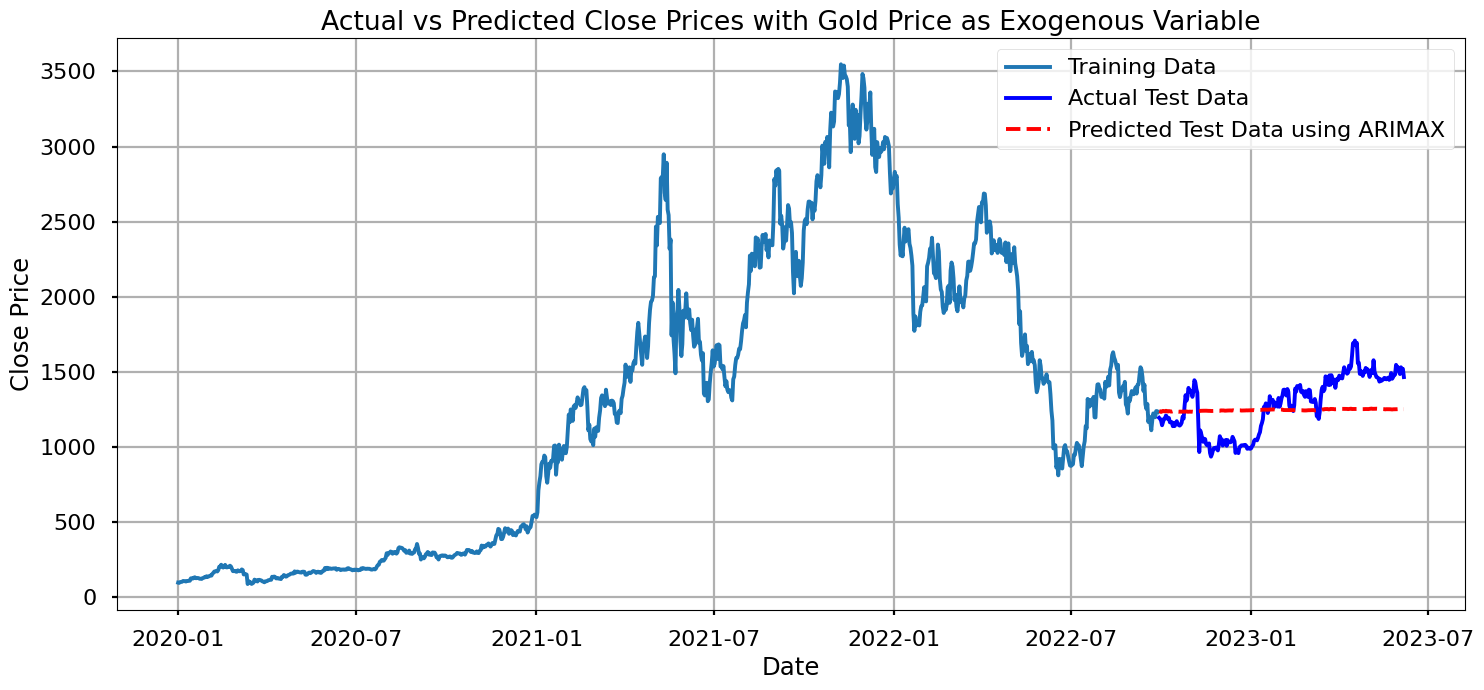

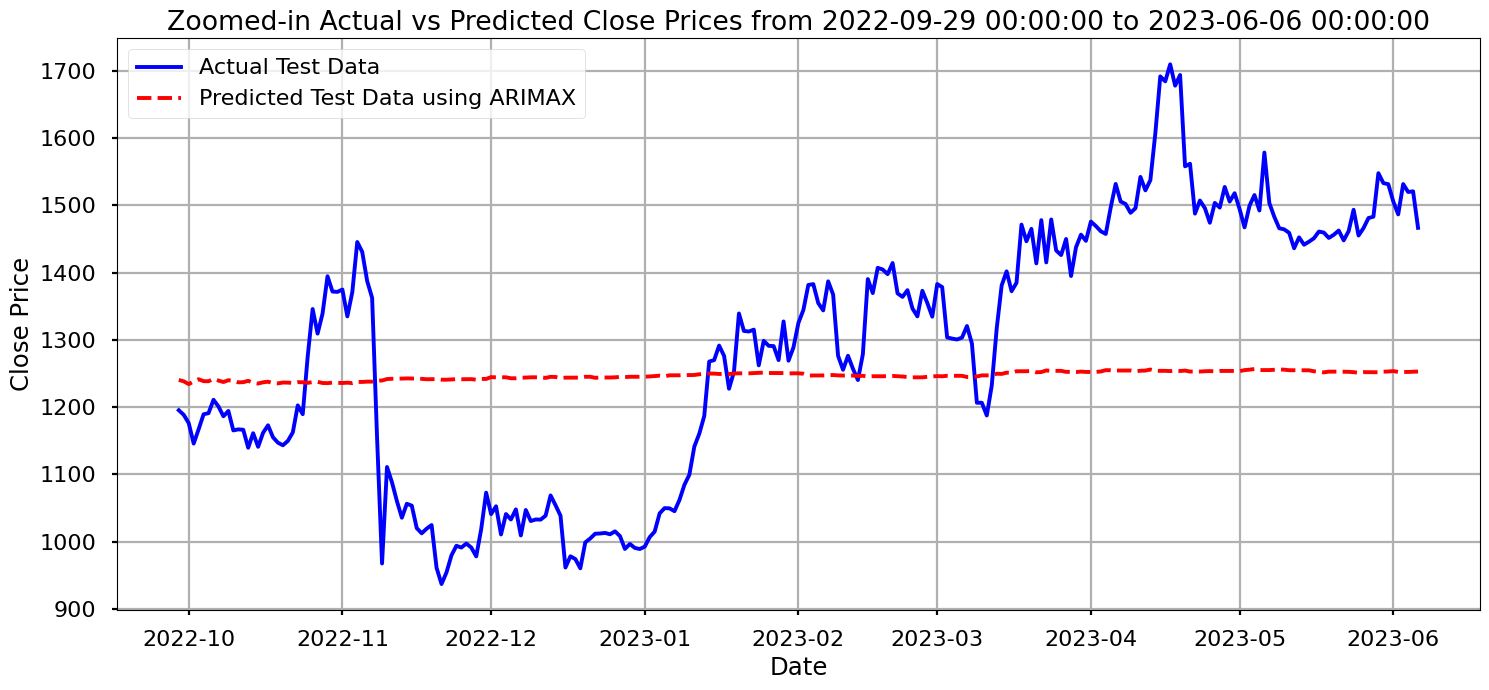

In [27]:
# Plotting the actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(train_arimax.index, train_arimax['Close'], label='Training Data')
plt.plot(test_arimax.index, test_arimax['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_arimax, predicted_values_arimax, color='red', linestyle='--', label='Predicted Test Data using ARIMAX')
plt.title('Actual vs Predicted Close Prices with Gold Price as Exogenous Variable')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in version
start_point_arimax = predicted_dates_arimax[0]
end_point_arimax = predicted_dates_arimax[-1]

plt.figure(figsize=(15, 7))
plt.plot(test_arimax.index, test_arimax['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_arimax, predicted_values_arimax, color='red', linestyle='--', label='Predicted Test Data using ARIMAX')
plt.title(f'Zoomed-in Actual vs Predicted Close Prices from {start_point_arimax} to {end_point_arimax}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Compute the metrics for the ARIMAX model
mse_arimax = mean_squared_error(test_arimax['Close'], predicted_values_arimax)
rmse_arimax = np.sqrt(mse_arimax)
mape_arimax = np.mean(np.abs((test_arimax['Close'] - predicted_values_arimax) / test_arimax['Close'])) * 100
r2_arimax = r2_score(test_arimax['Close'], predicted_values_arimax)

mse_arimax, rmse_arimax, mape_arimax, r2_arimax


(37005.59939851524,
 192.36839500945896,
 13.412315159970536,
 -0.0028970288615008943)

In [29]:
# Display the summary of the ARIMAX model fit
arimax_summary = model_fit_arimax.summary()
arimax_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1002
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5743.654
Date:                Mon, 28 Aug 2023   AIC                          11499.308
Time:                        17:30:19   BIC                          11528.761
Sample:                    01-01-2020   HQIC                         11510.502
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Close_gold     0.0500      0.173      0.289      0.772      -0.289       0.389
ar.L1         -0.4606      0.059     -7.757      0.000      -0.577      -0.344
ar.L2         -0.8761      0.055    -16.014      0.000      -0.983      -0.769
ma.L1          0.3999      0.061      6.506      0.000       0.279       0.520
ma.L2          0.8624      0.058     14.853      0.000       0.749       0.976
sigma2      5722.9821    124.394     46.007      0.000    5479.174    5966.790
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2690.40
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              65.08   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The ARIMAX model fit summary provides several insights:

Coefficients: The coefficient for 'Close_gold' is not statistically significant (with a p-value of 0.778, which is much larger than the common significance threshold of 0.05). This suggests that 'Close_gold' might not be a strong predictor for the 'Close' price of Ethereum in this particular model setup.
Model Fit: The Ljung-Box test (which tests for autocorrelation in the residuals) has a high p-value, indicating that there's no significant autocorrelation in the residuals. This is a good sign.
Warnings: There's a note indicating that the covariance matrix was calculated using the outer product of gradients. This is a common method when fitting ARIMA models but may sometimes indicate potential issues with model convergence.
The waterline-like prediction could be due to the weak influence of 'Close_gold' on the 'Close' price of Ethereum in this model configuration, combined with the ARIMA model's inherent behavior, which might revert to a mean or a similar value in the absence of strong patterns.

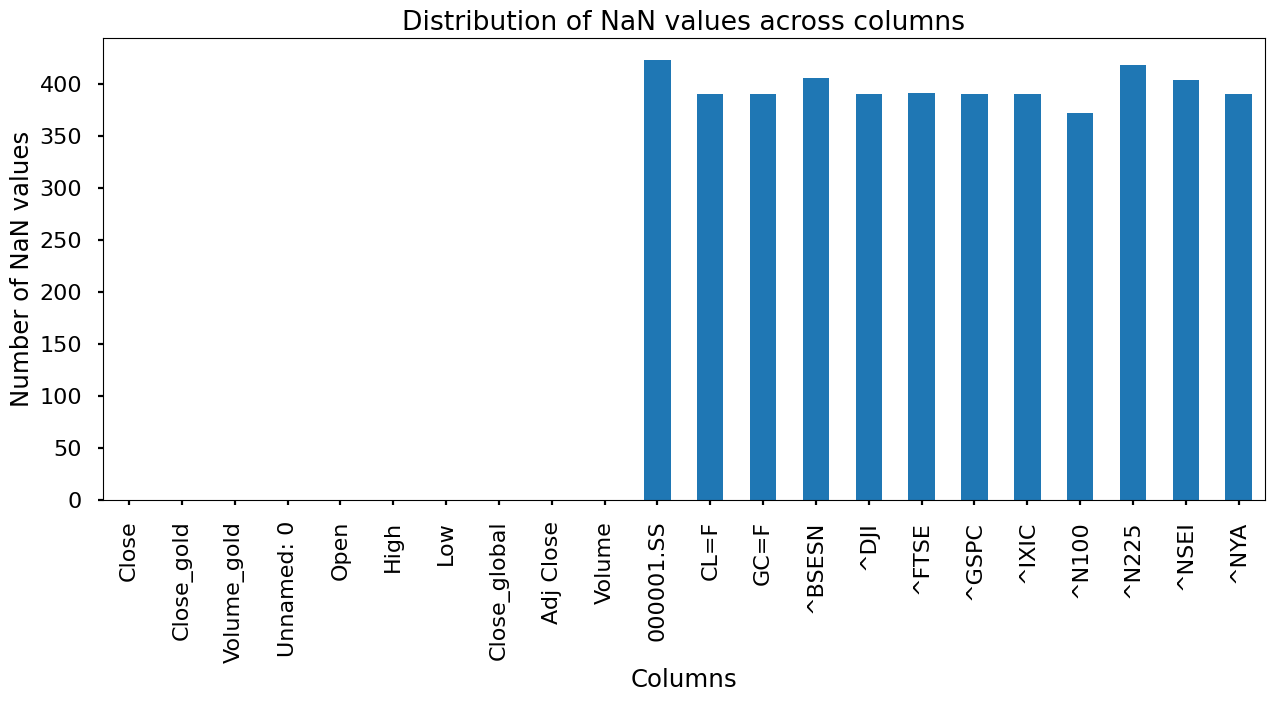

Close             0
Close_gold        0
Volume_gold       0
Unnamed: 0        0
Open              0
High              0
Low               0
Close_global      0
Adj Close         0
Volume            0
000001.SS       423
CL=F            390
GC=F            390
^BSESN          406
^DJI            390
^FTSE           391
^GSPC           390
^IXIC           390
^N100           372
^N225           418
^NSEI           404
^NYA            390
dtype: int64

In [31]:
# Check the distribution of NaN values in the merged_data dataset
nan_distribution = merged_data.isnull().sum()

# Visualize NaN values distribution
plt.figure(figsize=(15, 6))
nan_distribution.plot(kind='bar')
plt.title('Distribution of NaN values across columns')
plt.ylabel('Number of NaN values')
plt.xlabel('Columns')
plt.show()

nan_distribution


We have successfully merged the data. From the combined dataset, you can have some value, mainly because some stock markets are closed on weekends or public holidays, while cryptocurrency markets are open all the time.

In [32]:
# Saving the merged data to a CSV file
merged_data_path = "final_merged_eth_gold_global_data_v1.csv"

merged_data = pd.read_csv(merged_data_path, parse_dates=['Date'], index_col='Date')

In [33]:
# Calculate the correlation of other columns with the 'Close' column (ETH Close Price)
correlations = merged_data.corr()['Close'].drop('Close', axis=0).sort_values(ascending=False)

correlations


Close_global    1.000000
Adj Close       1.000000
Low             0.998396
High            0.998339
Open            0.996772
^GSPC           0.908287
^NYA            0.859267
^DJI            0.848839
^IXIC           0.844759
^N100           0.782496
^NSEI           0.749502
^BSESN          0.738668
^N225           0.718821
CL=F            0.633265
000001.SS       0.595626
^FTSE           0.575909
Unnamed: 0      0.511610
GC=F            0.238969
Close_gold      0.230302
Volume          0.212728
Volume_gold    -0.292679
Name: Close, dtype: float64

## STOCK external Direct forecasting


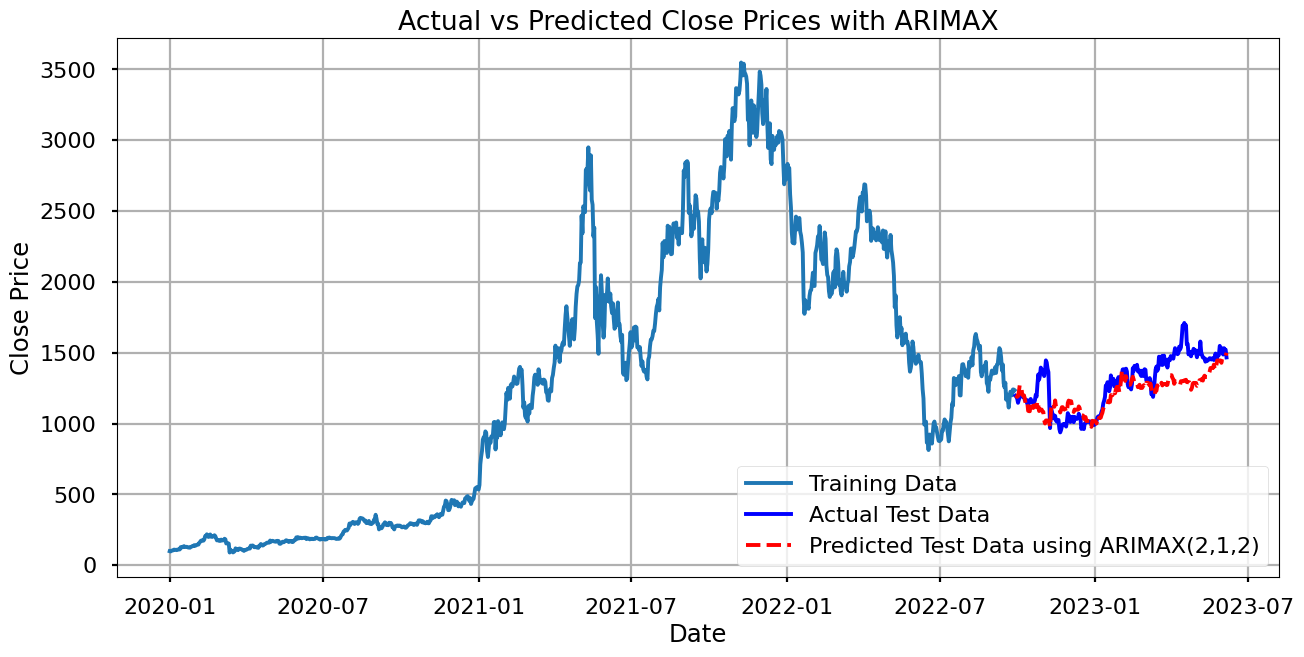

In [34]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Load the merged data
merged_data_corrected = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])
merged_data_corrected.set_index('Date', inplace=True)

# 2. Check and handle NaN or infinite values
# Replace infinite values with NaN
merged_data_corrected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values using forward fill and then backward fill
merged_data_corrected.fillna(method='ffill', inplace=True)
merged_data_corrected.fillna(method='bfill', inplace=True)

# 3. Split the data
train_size_corrected = int(len(merged_data_corrected) * 0.8)
training_data_corrected, testing_data_corrected = merged_data_corrected[:train_size_corrected], merged_data_corrected[train_size_corrected:]

# 4. Define exogenous variables
exogenous_train_corrected = training_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]
exogenous_test_corrected = testing_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]

# 5. Train the ARIMAX model
model_arimax_corrected = ARIMA(training_data_corrected['Close'], order=(2,1,2), exog=exogenous_train_corrected)
model_fit_arimax_corrected = model_arimax_corrected.fit()

# 6. Forecast using the ARIMAX model
forecast_arimax_corrected = model_fit_arimax_corrected.forecast(steps=len(testing_data_corrected), exog=exogenous_test_corrected)

# 7. Visualize the results
plt.figure(figsize=(15, 7))
plt.plot(training_data_corrected.index, training_data_corrected['Close'], label='Training Data')
plt.plot(testing_data_corrected.index, testing_data_corrected['Close'], color='blue', label='Actual Test Data')
plt.plot(testing_data_corrected.index, forecast_arimax_corrected, color='red', linestyle='--', label='Predicted Test Data using ARIMAX(2,1,2)')
plt.title('Actual vs Predicted Close Prices with ARIMAX')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the error metrics
corrected_mse = mean_squared_error(testing_data_corrected['Close'],forecast_arimax_corrected)
corrected_rmse = np.sqrt(corrected_mse)
corrected_mape = np.mean(np.abs((testing_data_corrected['Close'] - forecast_arimax_corrected ) / testing_data_corrected['Close'])) * 100
corrected_r2 = r2_score(testing_data_corrected['Close'], forecast_arimax_corrected)

corrected_mse, corrected_rmse, corrected_mape, corrected_r2 


(20571.166448462634, 143.4265193346845, 8.056139730236904, 0.4424962155266067)

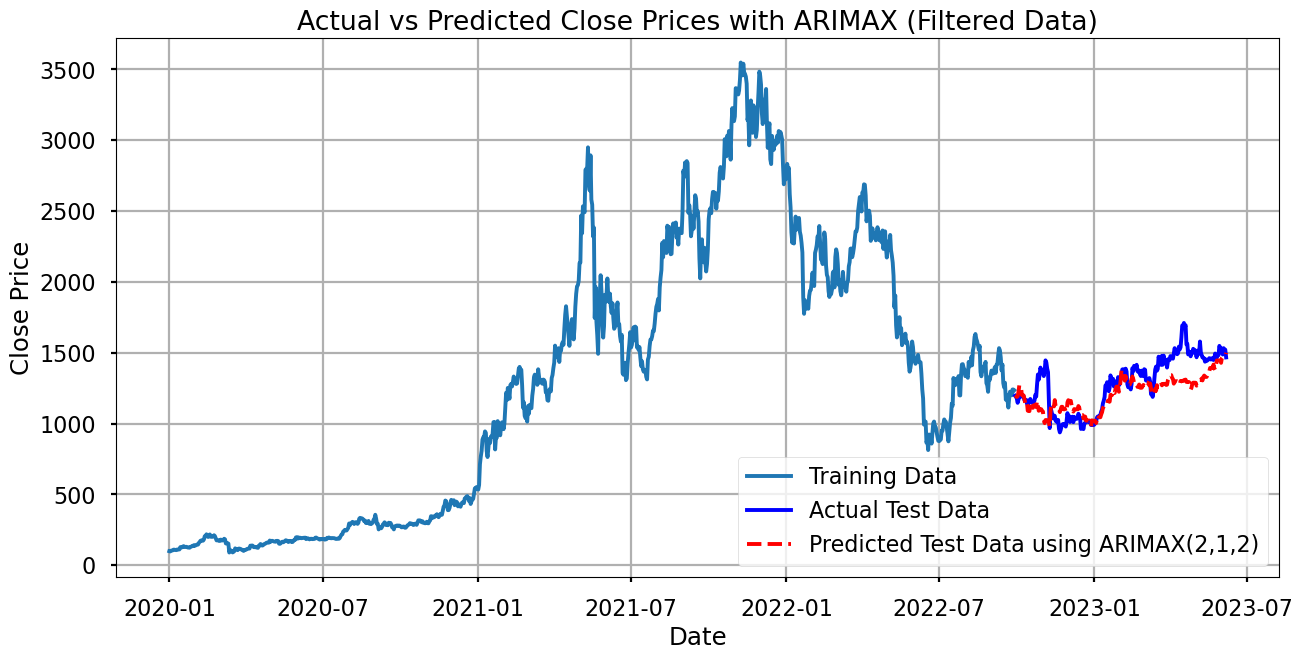

In [16]:
# Filter the data to only include rows where all selected exogenous variables and 'Close' are not NaN
filtered_data = merged_data_corrected.dropna(subset=['Close', '^IXIC', '^GSPC', '^DJI', '^NYA' ])

# Split the data into training and testing datasets
train_size_filtered = int(len(filtered_data) * 0.8)
training_data_filtered, testing_data_filtered = filtered_data.iloc[:train_size_filtered], filtered_data.iloc[train_size_filtered:]

# Exogenous variables for ARIMAX
exogenous_train_filtered = training_data_filtered[['^IXIC', '^GSPC', '^DJI', '^NYA' ]]
exogenous_test_filtered = testing_data_filtered[['^IXIC', '^GSPC', '^DJI', '^NYA' ]]

# Train the ARIMAX model
model_arimax_filtered = ARIMA(training_data_filtered['Close'], order=(2,1,2), exog=exogenous_train_filtered)
# Correcting the error and re-training the ARIMAX model
model_fit_arimax_filtered = model_arimax_filtered.fit()

# Forecast using the ARIMAX model
forecast_arimax_filtered = model_fit_arimax_filtered.forecast(steps=len(testing_data_filtered), exog=exogenous_test_filtered)

# Visualization of the predictions
plt.figure(figsize=(15, 7))
plt.plot(training_data_filtered.index, training_data_filtered['Close'], label='Training Data')
plt.plot(testing_data_filtered.index, testing_data_filtered['Close'], color='blue', label='Actual Test Data')
plt.plot(testing_data_filtered.index, forecast_arimax_filtered, color='red', linestyle='--', label='Predicted Test Data using ARIMAX(2,1,2)')
plt.title('Actual vs Predicted Close Prices with ARIMAX (Filtered Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error

# Calculating the error metrics
mse_arimax_filtered = mean_squared_error(testing_data_corrected['Close'], forecast_arimax_filtered)
rmse_arimax_filtered = np.sqrt(mse_arimax_filtered)
mape_arimax_filtered = np.mean(np.abs((testing_data_corrected['Close'] - forecast_arimax_filtered) / testing_data_corrected['Close'])) * 100
r2_arimax_filtered = r2_score(testing_data_filtered['Close'], forecast_arimax_filtered)


mse_arimax_filtered, rmse_arimax_filtered, mape_arimax_filtered, r2_arimax_filtered


(20380.72402185547, 142.76107320224048, 8.039880509569649, 0.4476574383393134)

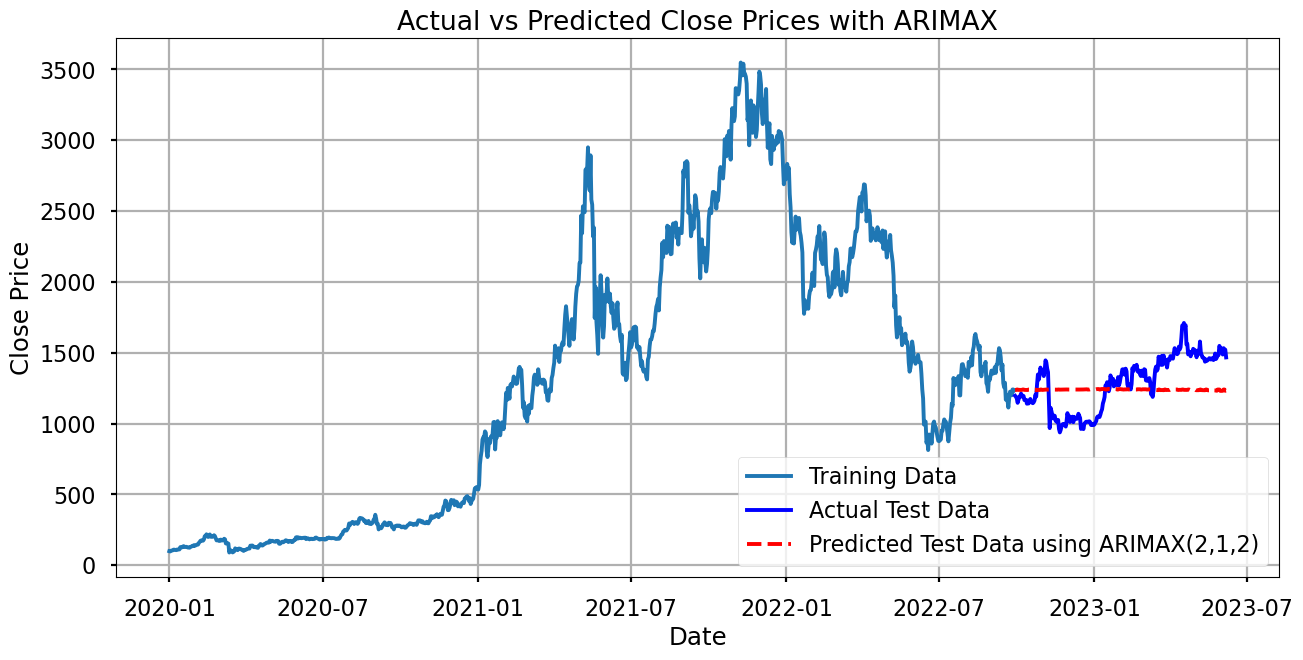

In [21]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
'''
This method uses mean interpolation to fill in missing values.

'''
# 1. Load the merged data
merged_data_mean = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])
merged_data_mean.set_index('Date', inplace=True)

# 2. Check and handle NaN or infinite values
# Replace infinite values with NaN
merged_data_mean.replace([np.inf, -np.inf], np.nan, inplace=True)


'''
This method uses mean imputation to fill missing values

'''
# Using mean to fill NaN values
for col in ['^IXIC', '^GSPC', '^DJI', '^NYA']:
    merged_data_mean[col].fillna(merged_data_mean[col].mean(), inplace=True)

# 3. Split the data
train_size_mean = int(len(merged_data_mean) * 0.8)
training_data_mean, testing_data_mean = merged_data_mean[:train_size_mean], merged_data_mean[train_size_mean:]

# 4. Define exogenous variables
exogenous_train_mean = training_data_mean[['^IXIC', '^GSPC', '^DJI', '^NYA']]
exogenous_test_mean = testing_data_mean[['^IXIC', '^GSPC', '^DJI', '^NYA']]

# 5. Train the ARIMAX model
model_arimax_mean = ARIMA(training_data_mean['Close'], order=(2,1,2), exog=exogenous_train_mean)
model_fit_arimax_mean = model_arimax_mean.fit()

# 6. Forecast using the ARIMAX model
forecast_arimax_mean = model_fit_arimax_mean.forecast(steps=len(testing_data_mean), exog=exogenous_test_mean)

# 7. Visualize the results
plt.figure(figsize=(15, 7))
plt.plot(training_data_mean.index, training_data_mean['Close'], label='Training Data')
plt.plot(testing_data_mean.index, testing_data_mean['Close'], color='blue', label='Actual Test Data')
plt.plot(testing_data_mean.index, forecast_arimax_mean, color='red', linestyle='--', label='Predicted Test Data using ARIMAX(2,1,2)')
plt.title('Actual vs Predicted Close Prices with ARIMAX')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error

# Calculating the error metrics
mean_na_mse = mean_squared_error(testing_data_corrected['Close'], forecast_arimax_mean)
mean_na_rmse = np.sqrt(mean_na_mse)
mean_na_mape = np.mean(np.abs((testing_data_corrected['Close'] - forecast_arimax_mean) / testing_data_corrected['Close'])) * 100
mean_na_r2 = r2_score(testing_data_corrected['Close'], forecast_arimax_mean)

mean_na_mse, mean_na_rmse, mean_na_mape, mean_na_r2


(39596.46266337345, 198.98859933014617, 13.7855452402697, -0.07311259387723656)

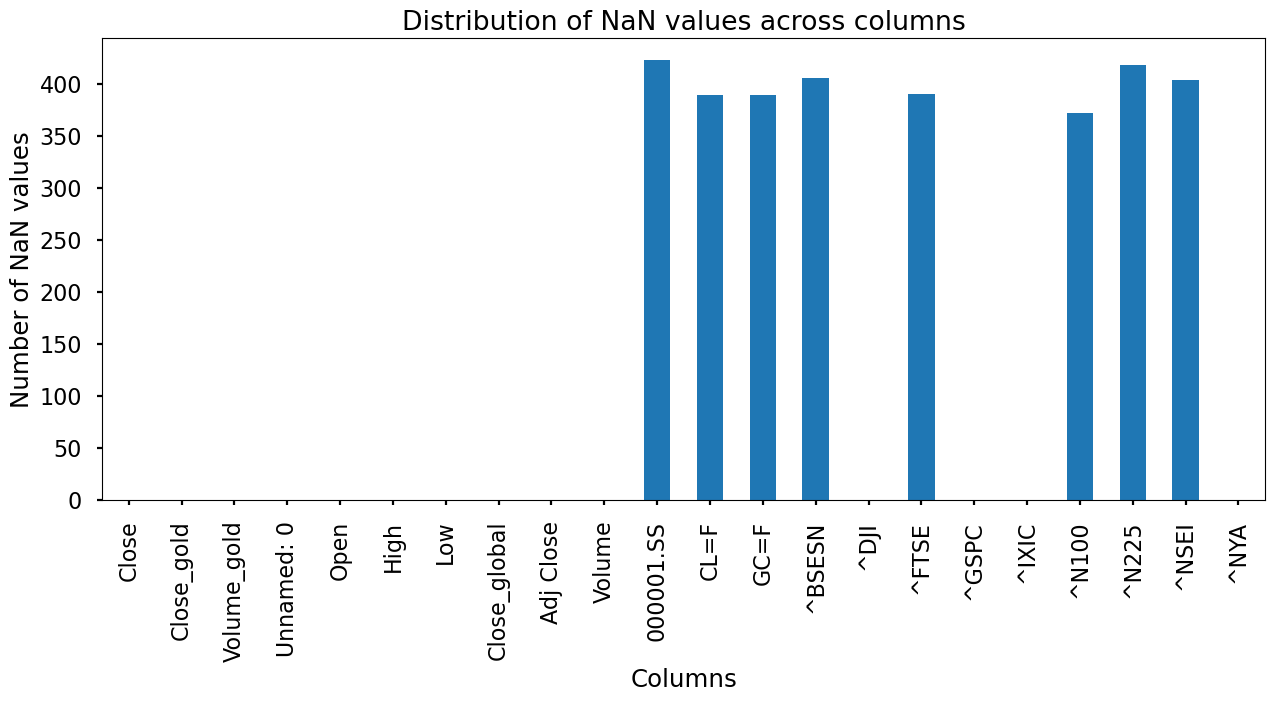

Close             0
Close_gold        0
Volume_gold       0
Unnamed: 0        0
Open              0
High              0
Low               0
Close_global      0
Adj Close         0
Volume            0
000001.SS       423
CL=F            390
GC=F            390
^BSESN          406
^DJI              0
^FTSE           391
^GSPC             0
^IXIC             0
^N100           372
^N225           418
^NSEI           404
^NYA              0
dtype: int64

In [23]:
# Check the distribution of NaN values in the merged_data_mean_filled dataset
nan_distribution = merged_data_mean.isnull().sum()

# Visualize NaN values distribution
plt.figure(figsize=(15, 6))
nan_distribution.plot(kind='bar')
plt.title('Distribution of NaN values across columns')
plt.ylabel('Number of NaN values')
plt.xlabel('Columns')
plt.show()

nan_distribution


## The following is a rolling forecast using arimax, both for gold and stocks.

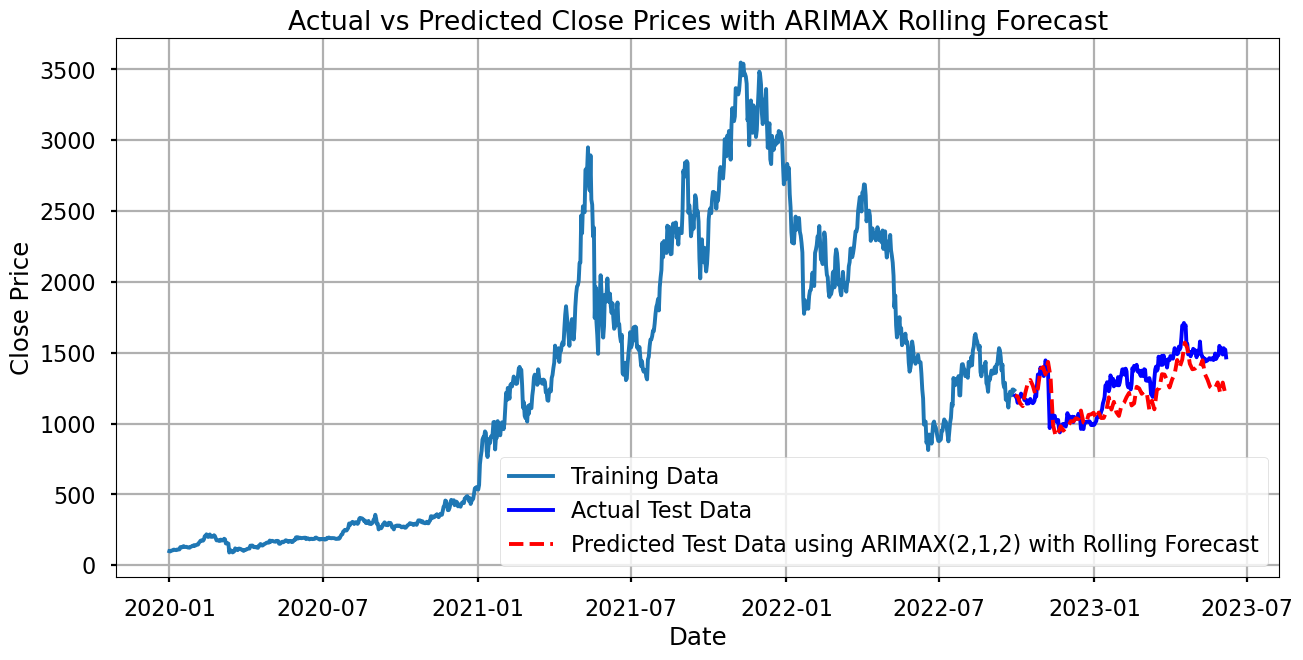

In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Load the merged data
merged_data_corrected = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])
merged_data_corrected.set_index('Date', inplace=True)

# 2. Check and handle NaN or infinite values
merged_data_corrected.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data_corrected.fillna(method='ffill', inplace=True)
merged_data_corrected.fillna(method='bfill', inplace=True)

# 3. Split the data
train_size_corrected = int(len(merged_data_corrected) * 0.8)
train_corrected, test_corrected = merged_data_corrected[:train_size_corrected], merged_data_corrected[train_size_corrected:]

def perform_rolling_forecast_arimax(train, test, exog_train, exog_test, step_size, order=(2,1,2)):
    predictions = []
    predicted_dates = []

    for idx, date in enumerate(test.index[::step_size]):
        model = ARIMA(train['Close'], order=order, exog=exog_train)
        model_fit = model.fit()
        
        forecast = model_fit.forecast(steps=1, exog=exog_test.iloc[idx:idx+1]).values
        predictions.append(forecast[0])
        predicted_dates.append(date)

        train = train.append(test.iloc[:idx * step_size + 1])
        exog_train = exog_train.append(exog_test.iloc[:idx * step_size + 1])

    return predictions, predicted_dates

# 4. Define exogenous variables
exogenous_train_corrected = train_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]
exogenous_test_corrected = test_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]

# 5. Forecast using the ARIMAX model with rolling forecast
predictions_arimax, predicted_dates_arimax = perform_rolling_forecast_arimax(train_corrected, test_corrected, exogenous_train_corrected, exogenous_test_corrected, 3, (2,1,2))

# 6. Visualize the results
plt.figure(figsize=(15, 7))
plt.plot(train_corrected.index, train_corrected['Close'], label='Training Data')
plt.plot(test_corrected.index, test_corrected['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_arimax, predictions_arimax, color='red', linestyle='--', label='Predicted Test Data using ARIMAX(2,1,2) with Rolling Forecast')
plt.title('Actual vs Predicted Close Prices with ARIMAX Rolling Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Extracting the actual values corresponding to the predicted dates
actual_values_arimax = test_corrected.loc[predicted_dates_arimax, 'Close']

# 1. Mean Squared Error (MSE)
mse_arimax = mean_squared_error(actual_values_arimax, predictions_arimax)

# 2. Root Mean Squared Error (RMSE)
rmse_arimax = np.sqrt(mse_arimax)

# 3. Mean Absolute Percentage Error (MAPE)
mape_arimax = np.mean(np.abs((actual_values_arimax - predictions_arimax) / actual_values_arimax)) * 100

# 4. R^2 (coefficient of determination)
r2_arimax = r2_score(actual_values_arimax, predictions_arimax)

mse_arimax, rmse_arimax, mape_arimax, r2_arimax


(19230.170189136217, 138.67288916416294, 8.611448919284745, 0.4911757865149041)

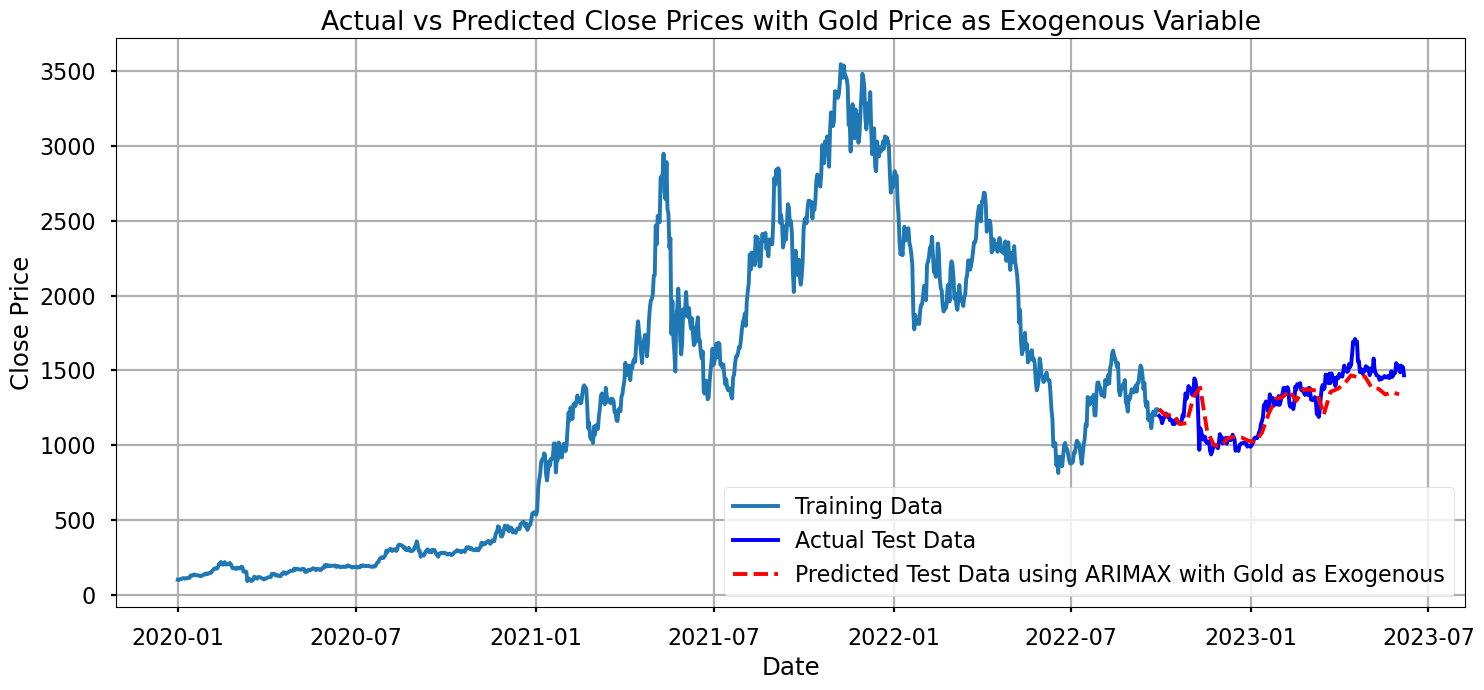

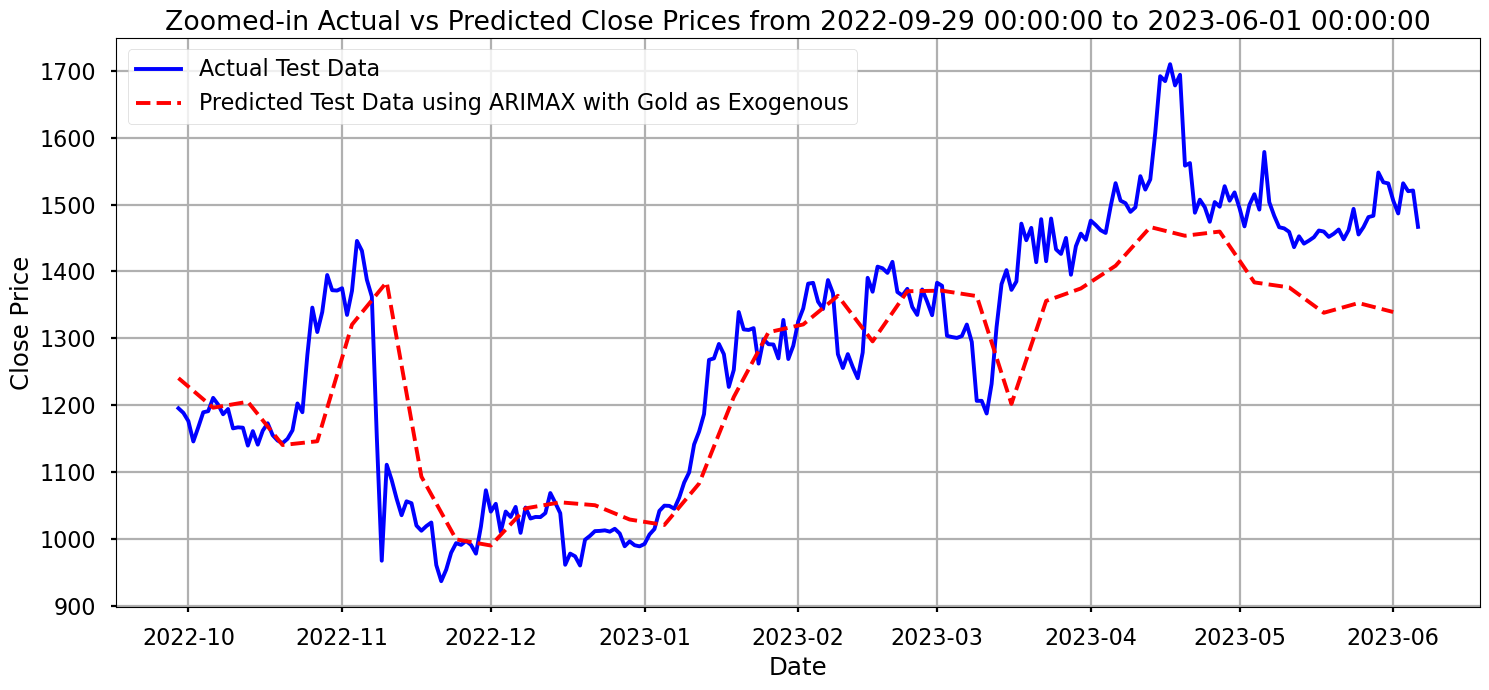

In [25]:
# Redefine the rolling forecast function for ARIMAX with Close_gold as exogenous variable
def perform_rolling_forecast_arimax_with_gold(train, test, exog_train, exog_test, step_size, order=(2,1,2)):
    predictions = []
    predicted_dates = []
    
    for idx, date in enumerate(test.index[::step_size]):
        model = ARIMA(train['Close'], order=order, exog=exog_train)
        model_fit = model.fit()
        
        # Forecast the next point
        forecast = model_fit.forecast(steps=1, exog=exog_test.iloc[idx].values.reshape(1, -1)).values
        predictions.append(forecast[0])
        predicted_dates.append(date)
        
        # Append the actual observed values from the test data (till the predicted date) to the training data
        train = train.append(test.iloc[:idx * step_size + 1])
        exog_train = exog_train.append(exog_test.iloc[:idx * step_size + 1])

    return predictions, predicted_dates

# Split the data again for consistency
split_point = int(0.8 * len(merged_data_corrected))
train_arimax = merged_data_corrected[:split_point]
test_arimax = merged_data_corrected[split_point:]

# Perform rolling forecast for ARIMAX with Close_gold as exogenous variable
predictions_arimax_gold, predicted_dates_arimax_gold = perform_rolling_forecast_arimax_with_gold(
    train_arimax, test_arimax, train_arimax[['Close_gold']], test_arimax[['Close_gold']], 7, order=(2,1,2)
)

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(train_arimax.index, train_arimax['Close'], label='Training Data')
plt.plot(test_arimax.index, test_arimax['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_arimax_gold, predictions_arimax_gold, color='red', linestyle='--', label='Predicted Test Data using ARIMAX with Gold as Exogenous')
plt.title('Actual vs Predicted Close Prices with Gold Price as Exogenous Variable')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in version
start_point_arimax_gold = predicted_dates_arimax_gold[0]
end_point_arimax_gold = predicted_dates_arimax_gold[-1]

plt.figure(figsize=(15, 7))
plt.plot(test_arimax.index, test_arimax['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_arimax_gold, predictions_arimax_gold, color='red', linestyle='--', label='Predicted Test Data using ARIMAX with Gold as Exogenous')
plt.title(f'Zoomed-in Actual vs Predicted Close Prices from {start_point_arimax_gold} to {end_point_arimax_gold}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
# Extracting the actual values corresponding to the predicted dates with Close_gold as the exogenous variable
actual_values_arimax_gold = test_arimax.loc[predicted_dates_arimax_gold, 'Close']

# 1. Mean Squared Error (MSE)
mse_arimax_gold = mean_squared_error(actual_values_arimax_gold, predictions_arimax_gold)

# 2. Root Mean Squared Error (RMSE)
rmse_arimax_gold = np.sqrt(mse_arimax_gold)

# 3. Mean Absolute Percentage Error (MAPE)
mape_arimax_gold = np.mean(np.abs((actual_values_arimax_gold - predictions_arimax_gold) / actual_values_arimax_gold)) * 100

# 4. R^2 (coefficient of determination)
r2_arimax_gold = r2_score(actual_values_arimax_gold, predictions_arimax_gold)

mse_arimax_gold, rmse_arimax_gold, mape_arimax_gold, r2_arimax_gold


(8842.81307415479, 94.03623277309013, 5.572753781790389, 0.7303044976614992)

In [31]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
merged_data_corrected = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])
merged_data_corrected.set_index('Date', inplace=True)

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (with a seasonal period of 12)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal SARIMAX...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Grid search for the optimal parameters
best_aic = float("inf")
best_param = None
best_param_seasonal = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(merged_data_corrected['Close'], 
                          order=param,
                          seasonal_order=param_seasonal, 
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit(disp=0)  # suppress convergence messages
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal
        except:
            continue

best_param, best_param_seasonal, best_aic


Examples of parameter combinations for Seasonal SARIMAX...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


((0, 1, 1), (0, 1, 1, 12), 13960.69521618023)

In [32]:
# Converting the data to a logarithmic scale
bc_log = pd.DataFrame(np.log(merged_data_corrected['Close']))

# Splitting 80/20
index = round(len(merged_data_corrected)*.80)
train_log = bc_log.iloc[:index]
test_log = bc_log.iloc[index:]

# Fitting the model to the training set using best parameters found
model_log = SARIMAX(train_log, 
                order=best_param, 
                seasonal_order=best_param_seasonal,
                freq='D', 
                enforce_stationarity=False, 
                enforce_invertibility=False)
outputs_log = model_log.fit()

outputs_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1002
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1477.759
Date:                            Fri, 25 Aug 2023   AIC                          -2949.518
Time:                                    12:35:17   BIC                          -2934.870
Sample:                                01-01-2020   HQIC                         -2943.944
                                     - 09-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0652      0.026     -2.539      0.011      -0.116      -0.015
ma.S.L12      -1.0136      0.029    -35.352      0.000      -1.070      -0.957
sigma2         0.0027   9.69e-05     27.414      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5388.13
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.23
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

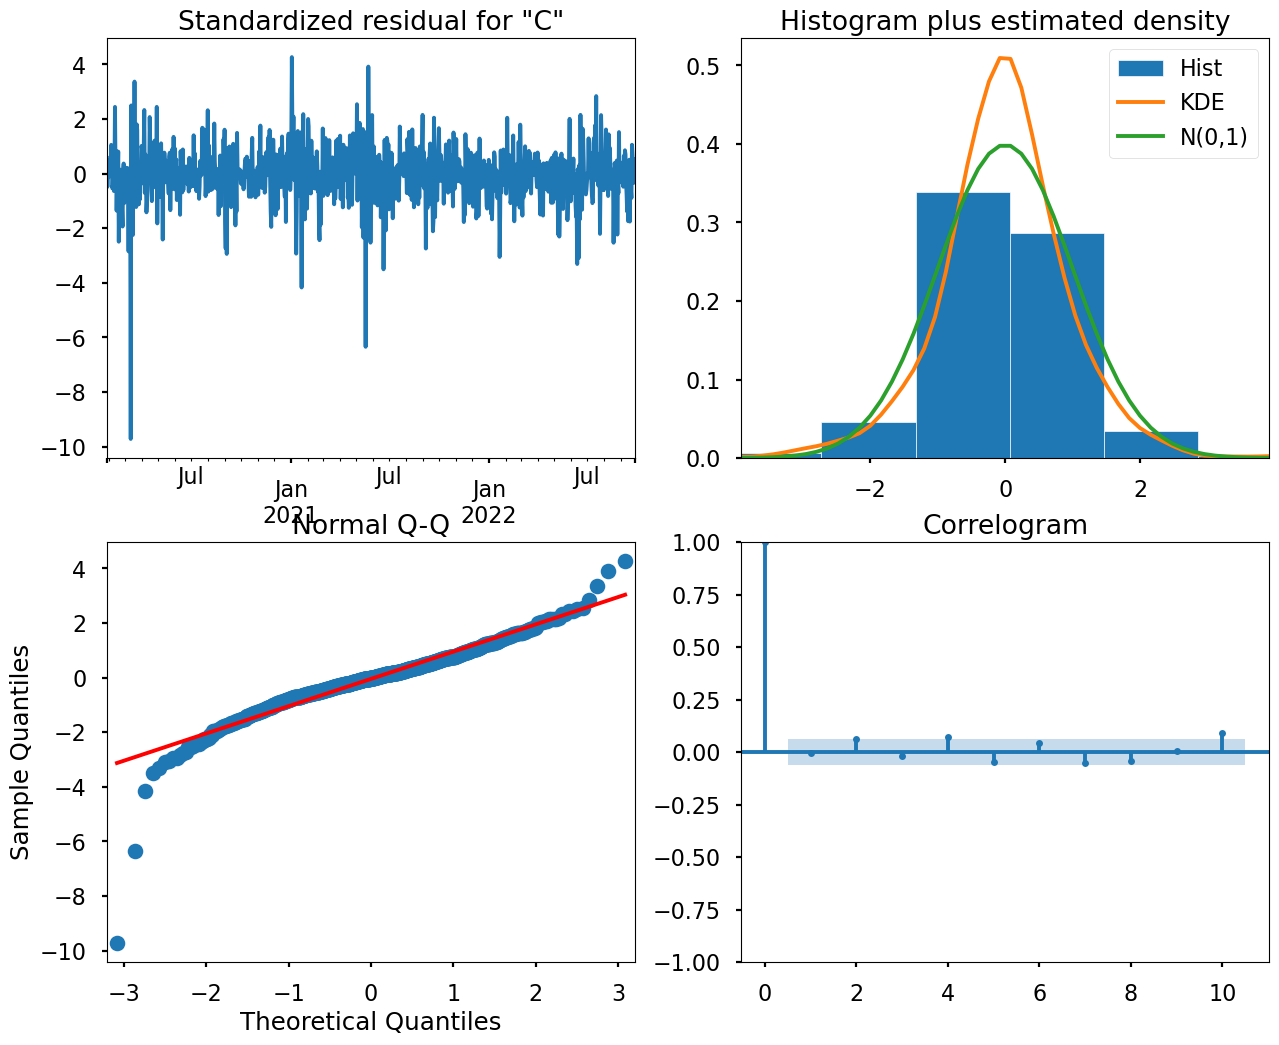

In [33]:
# Plotting the diagnostics of the model
fig = outputs_log.plot_diagnostics(figsize=(15, 12))
plt.show()


In [35]:
import numpy as np

ts_log = np.log(merged_data_corrected['Close'])
# Using the logarithmic transformed data: ts_log
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]

history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# Iteratively predict each point in the test set
for t in range(len(test_arima)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0,1,1,12))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    pred_value = output[0]
    original_value = test_arima.iloc[t]
    history.append(original_value)
    
    # Convert back to original scale
    pred_value_transformed = np.exp(pred_value)
    original_value_transformed = np.exp(original_value)
    
    # Error calculation
    error = ((abs(pred_value_transformed - original_value_transformed)) / original_value_transformed) * 100
    error_list.append(error)
    
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value_transformed, original_value_transformed, error), '%')
    predictions.append(float(pred_value_transformed))
    originals.append(float(original_value_transformed))

predictions[:5]  # Displaying the first 5 predictions for review


Printing Predicted vs Expected Values...


predicted = 1379.140312,   expected = 1354.895752,   error = 1.789404  %
predicted = 1360.309803,   expected = 1334.582397,   error = 1.927750  %
predicted = 1340.238063,   expected = 1383.103516,   error = 3.099222  %
predicted = 1375.787520,   expected = 1378.577271,   error = 0.202364  %
predicted = 1395.633055,   expected = 1303.777466,   error = 7.045343  %
predicted = 1306.709481,   expected = 1301.972778,   error = 0.363810  %
predicted = 1296.396354,   expected = 1300.705566,   error = 0.331298  %
predicted = 1310.643894,   expected = 1303.425293,   error = 0.553818  %
predicted = 1301.741385,   expected = 1320.651978,   error = 1.431913  %
predicted = 1316.555176,   expected = 1294.679932,   error = 1.689626  %
predicted = 1293.553385,   expected = 1206.650757,   error = 7.201970  %
predicted = 1224.704296,   expected = 1206.650757,   error = 1.496169  %
predicted = 1213.749640,   expected = 1187.698975,   error = 2.193373  %
predicte

[1379.1403117192444,
 1360.3098033395001,
 1340.238062861458,
 1375.7875200487404,
 1395.633055308923]

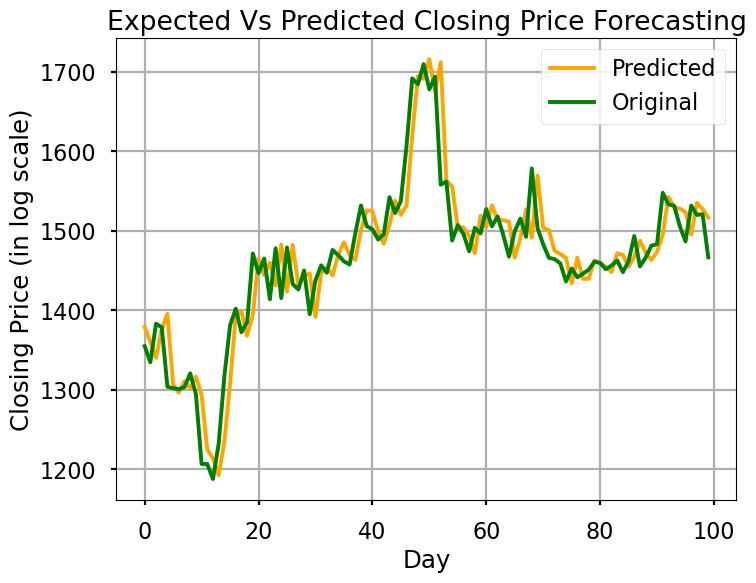

In [36]:
# Adjusting the test_day list for the length of predictions
test_day_adjusted = [t for t in range(len(predictions))]

# Plotting the original vs predicted values for the adjusted range
plt.figure(figsize=(8, 6))
labels = {'Original', 'Predicted'}
plt.plot(test_day_adjusted, predictions, color='orange', label='Predicted')
plt.plot(test_day_adjusted, originals, color='green', label='Original')
plt.title('Expected Vs Predicted Closing Price Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price (in log scale)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Compute the four metrics for the provided SARIMAX predictions

# 1. Mean Squared Error (MSE)
mse_sarimax = mean_squared_error(originals, predictions)

# 2. Root Mean Squared Error (RMSE)
rmse_sarimax = np.sqrt(mse_sarimax)

# 3. Mean Absolute Percentage Error (MAPE)
mape_sarimax = np.mean(np.abs((np.array(originals) - np.array(predictions)) / np.array(originals))) * 100

# 4. R^2 (coefficient of determination)
r2_sarimax = r2_score(originals, predictions)

mse_sarimax, rmse_sarimax, mape_sarimax, r2_sarimax


(1461.167591394472, 38.22522192734101, 1.9550298824932781, 0.8398906536174129)

## SARIMAX ROLLING FORECASTING using external features 

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the data
data_1 = merged_data_corrected[['Close']]
train_size = int(len(data_1) * 0.8)
training_data_df, testing_data_df = data_1[:train_size], data_1[train_size:]

# Convert training data to a list for efficiency
training_data = training_data_df.values.flatten().tolist()

# Parameters for the SARIMAX model
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Perform rolling forecast
sarimax_predictions = []
predicted_dates_sarimax = []

for date in testing_data_df.index:
    model = SARIMAX(training_data, order=order, seasonal_order=seasonal_order, 
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    
    # Forecast the next point
    output = model_fit.forecast()
    yhat = output[0]
    sarimax_predictions.append(yhat)
    predicted_dates_sarimax.append(date)
    
    # Append the actual observed value from the test data to the training data
    actual_test_value = testing_data_df.loc[date].values[0]
    training_data.append(actual_test_value)

# Convert predictions to a series for easier visualization or evaluation
forecast_series_sarimax = pd.Series(sarimax_predictions, index=predicted_dates_sarimax)
forecast_series_sarimax.name = "Close_forecast_sarimax"

forecast_series_sarimax.head()


2022-09-29    1231.114402
2022-09-30    1193.337775
2022-10-01    1197.341730
2022-10-02    1177.688944
2022-10-03    1144.951519
Name: Close_forecast_sarimax, dtype: float64

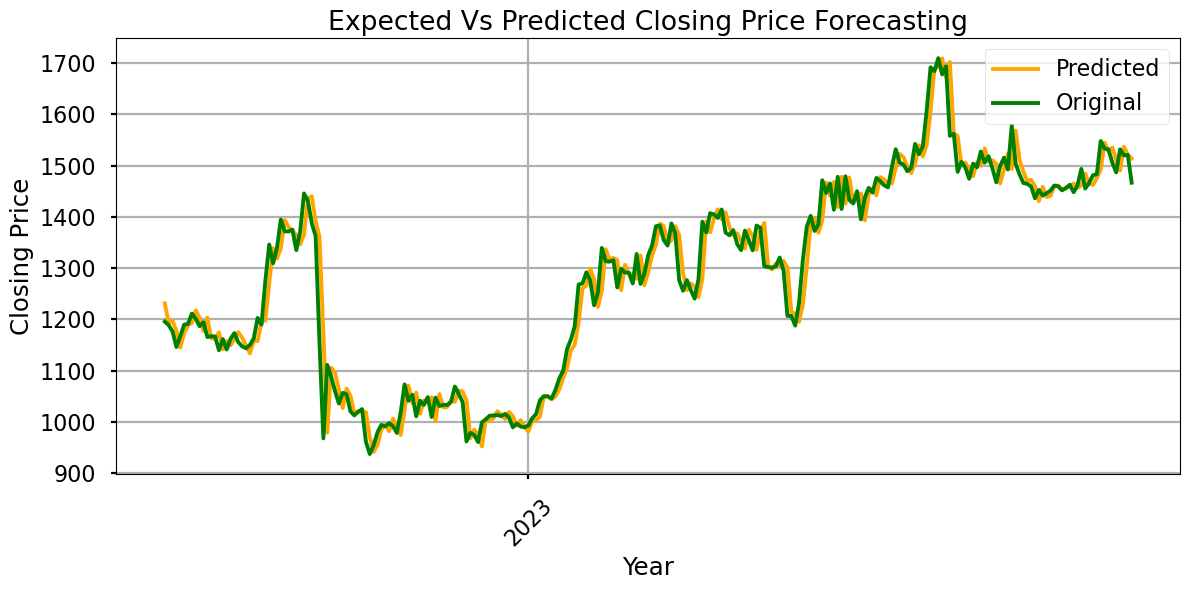

In [42]:
import matplotlib.dates as mdates

# Extracting the dates for the predicted data
test_dates_sarimax = forecast_series_sarimax.index

# Plotting the original vs predicted values
plt.figure(figsize=(12, 6))
labels = {'Original', 'Predicted'}
plt.plot(test_dates_sarimax, forecast_series_sarimax.values, color='orange', label='Predicted')
plt.plot(test_dates_sarimax, testing_data_df['Close'].values, color='green', label='Original')
plt.title('Expected Vs Predicted Closing Price Forecasting')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Setting the x-axis to display years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate date labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [43]:
# Compute the evaluation metrics
mse_sarimax_rolling = mean_squared_error(testing_data_df['Close'].values, forecast_series_sarimax.values)
rmse_sarimax_rolling = np.sqrt(mse_sarimax_rolling)
mape_sarimax_rolling = np.mean(np.abs((forecast_series_sarimax.values - testing_data_df['Close'].values) / testing_data_df['Close'].values)) * 100
r2_sarimax_rolling = r2_score(testing_data_df['Close'].values, forecast_series_sarimax.values)

mse_sarimax_rolling, rmse_sarimax_rolling, mape_sarimax_rolling, r2_sarimax_rolling


(1547.400212300681, 39.33700817678794, 2.134093202817863, 0.9580635606340625)

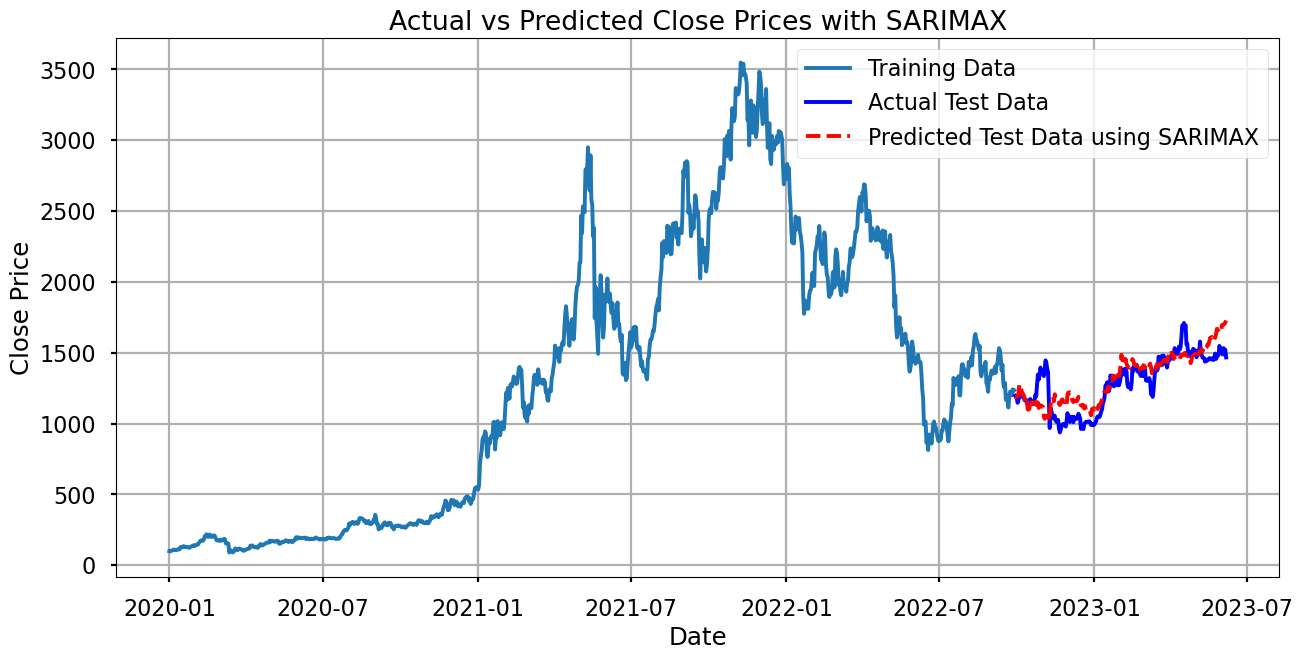

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load the merged data
merged_data_corrected = pd.read_csv('merged_eth_global_data_corrected.csv', parse_dates=['Date'])
merged_data_corrected.set_index('Date', inplace=True)

# 2. Check and handle NaN or infinite values
# Replace infinite values with NaN
merged_data_corrected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values using forward fill and then backward fill
merged_data_corrected.fillna(method='ffill', inplace=True)
merged_data_corrected.fillna(method='bfill', inplace=True)

# 3. Split the data
train_size_corrected = int(len(merged_data_corrected) * 0.8)
training_data_corrected, testing_data_corrected = merged_data_corrected[:train_size_corrected], merged_data_corrected[train_size_corrected:]

# 4. Define exogenous variables
exogenous_train_corrected = training_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]
exogenous_test_corrected = testing_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]

# 5. Train the SARIMAX model
model_sarimax_corrected = SARIMAX(training_data_corrected['Close'], exog=exogenous_train_corrected, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit_sarimax_corrected = model_sarimax_corrected.fit(disp=0)

# 6. Forecast using the SARIMAX model
forecast_sarimax_corrected = model_fit_sarimax_corrected.forecast(steps=len(testing_data_corrected), exog=exogenous_test_corrected)

# 7. Visualize the results
plt.figure(figsize=(15, 7))
plt.plot(training_data_corrected.index, training_data_corrected['Close'], label='Training Data')
plt.plot(testing_data_corrected.index, testing_data_corrected['Close'], color='blue', label='Actual Test Data')
plt.plot(testing_data_corrected.index, forecast_sarimax_corrected, color='red', linestyle='--', label='Predicted Test Data using SARIMAX')
plt.title('Actual vs Predicted Close Prices with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the error metrics
mse = mean_squared_error(testing_data_corrected['Close'], forecast_sarimax_corrected)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((testing_data_corrected['Close'] - forecast_sarimax_corrected) / testing_data_corrected['Close'])) * 100
r2 = r2_score(testing_data_corrected['Close'], forecast_sarimax_corrected)
mse, rmse, mape, r2


(14342.811902717058, 119.7614792106254, 7.611946365947389, 0.611292245591043)

In [39]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load the merged data
merged_data_corrected = pd.read_csv('merged_eth_global_data_corrected.csv', parse_dates=['Date'])
merged_data_corrected.set_index('Date', inplace=True)

# 2. Check and handle NaN or infinite values
# Replace infinite values with NaN
merged_data_corrected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values using forward fill and then backward fill
merged_data_corrected.fillna(method='ffill', inplace=True)
merged_data_corrected.fillna(method='bfill', inplace=True)

# 3. Split the data
train_size_corrected = int(len(merged_data_corrected) * 0.8)
training_data_corrected, testing_data_corrected = merged_data_corrected[:train_size_corrected], merged_data_corrected[train_size_corrected:]
# Defining the grid
p = range(0, 3)
d = range(1, 2)  # as our data is already somewhat stationary
q = range(0, 3)
s = [12]  # monthly seasonality observed from seasonal decomposition

# Create a list of all possible combinations of p, d, and q.
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in pdq]

# Split the data and define exogenous variables
exogenous_train_corrected = training_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]
exogenous_test_corrected = testing_data_corrected[['^IXIC', '^GSPC', '^DJI', '^NYA']]

# Finding the best parameters
best_aic = float('inf')
best_param = None
best_seasonal_param = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(training_data_corrected['Close'],
                            exog=exogenous_train_corrected,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_seasonal_param = param_seasonal
                best_model = results
        except:
            continue

best_param, best_seasonal_param, best_aic


((0, 1, 2), (1, 1, 2, 12), 11028.742412970112)

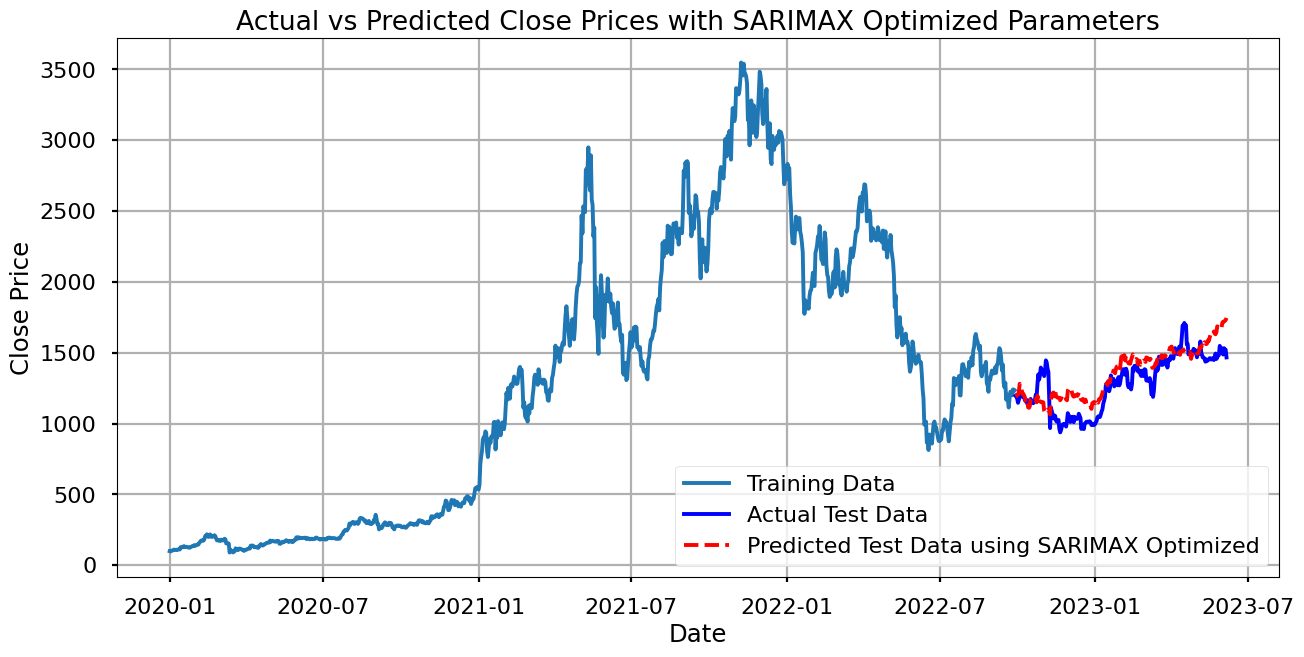

In [42]:
# Using the best parameters to fit the SARIMAX model
best_model = SARIMAX(training_data_corrected['Close'],
                     exog=exogenous_train_corrected,
                     order=(0,1,2),
                     seasonal_order=(1, 1, 2, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

results_best_model = best_model.fit()

# Forecasting
forecast_sarimax_optimized = results_best_model.forecast(steps=len(testing_data_corrected), exog=exogenous_test_corrected)

# Visualizing the results
plt.figure(figsize=(15, 7))
plt.plot(training_data_corrected.index, training_data_corrected['Close'], label='Training Data')
plt.plot(testing_data_corrected.index, testing_data_corrected['Close'], color='blue', label='Actual Test Data')
plt.plot(testing_data_corrected.index, forecast_sarimax_optimized, color='red', linestyle='--', label='Predicted Test Data using SARIMAX Optimized')
plt.title('Actual vs Predicted Close Prices with SARIMAX Optimized Parameters')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the error metrics
mse = mean_squared_error(testing_data_df['Close'], forecast_sarimax_optimized)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((testing_data_df['Close'] - forecast_sarimax_optimized) / testing_data_df['Close'])) * 100
r2 = r2_score(testing_data_df['Close'], forecast_sarimax_optimized)

# Structured output
print("Error Metrics for the SARIMAX Optimized Model:\n")
print(f"1. Mean Squared Error (MSE): {mse:.2f}")
print(f"2. Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"3. Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"4. R-squared (R²): {r2:.2f}")


Error Metrics for the SARIMAX Optimized Model:

1. Mean Squared Error (MSE): 17712.32
2. Root Mean Squared Error (RMSE): 133.09
3. Mean Absolute Percentage Error (MAPE): 9.02%
4. R-squared (R²): 0.52


In [44]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)


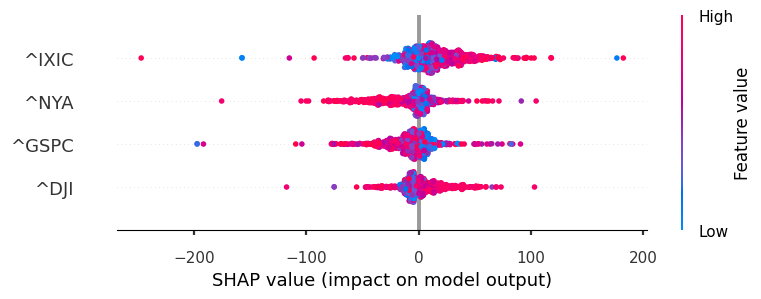

In [45]:
import xgboost as xgb
import shap

# 1. Compute residuals from SARIMAX model using best parameters
best_model_sarimax = SARIMAX(training_data_corrected['Close'],
                             exog=exogenous_train_corrected,
                             order=best_param,
                             seasonal_order=best_seasonal_param,
                             enforce_stationarity=False,
                             enforce_invertibility=False)
results_best_model = best_model_sarimax.fit()
residuals = training_data_corrected['Close'] - results_best_model.predict(exog=exogenous_train_corrected)

# 2. Train XGBoost on residuals
model_xgb = xgb.XGBRegressor()
model_xgb.fit(exogenous_train_corrected, residuals)

# 3. Compute SHAP values
explainer = shap.Explainer(model_xgb)
shap_values = explainer.shap_values(exogenous_train_corrected)

# 4. Plot SHAP values
shap.summary_plot(shap_values, exogenous_train_corrected)


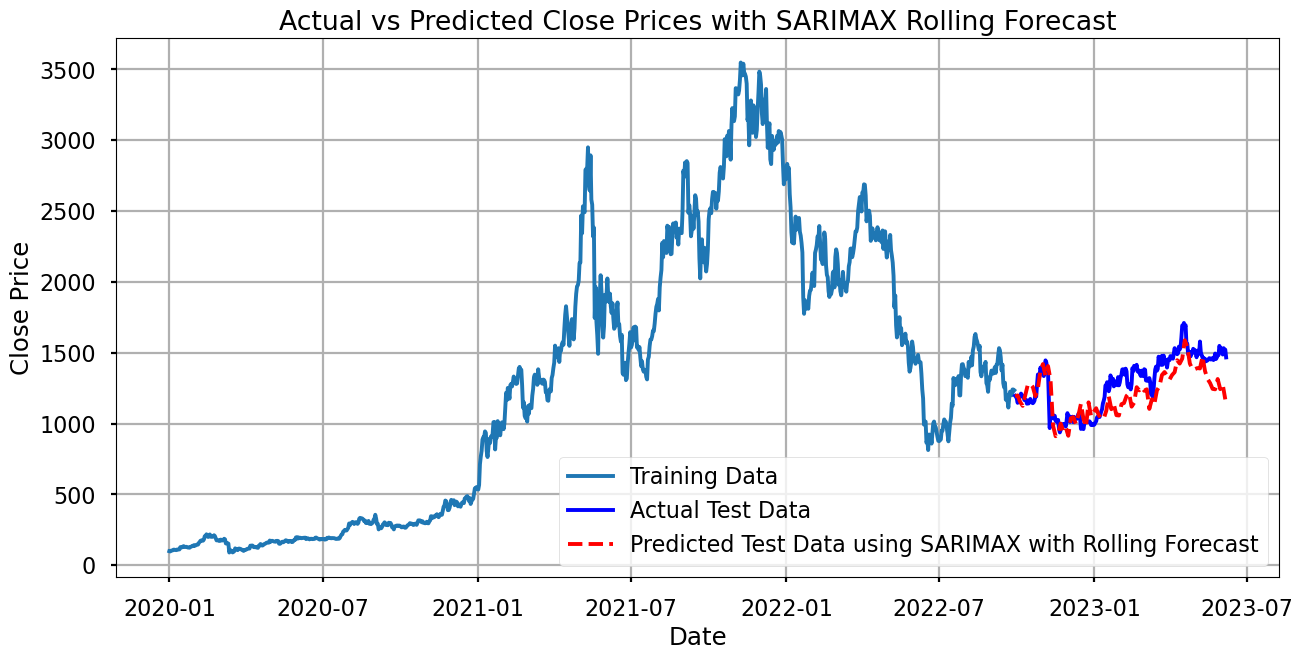

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def perform_rolling_forecast_sarimax(train, test, exog_train, exog_test, step_size, order=(0,1,2), seasonal_order=(1,1,2,12)):
    predictions = []
    predicted_dates = []

    for idx, date in enumerate(test.index[::step_size]):
        model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order, exog=exog_train, 
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=0)

        forecast = model_fit.forecast(steps=1, exog=exog_test.iloc[idx:idx+1]).values
        predictions.append(forecast[0])
        predicted_dates.append(date)

        train = train.append(test.iloc[:idx * step_size + 1])
        exog_train = exog_train.append(exog_test.iloc[:idx * step_size + 1])

    return predictions, predicted_dates

# Forecast using the SARIMAX model with rolling forecast
predictions_sarimax, predicted_dates_sarimax = perform_rolling_forecast_sarimax(train_corrected, test_corrected, 
                                                                                exogenous_train_corrected, exogenous_test_corrected, 
                                                                                3, (0,1,2), (1,1,2,12))

# Visualize the results
plt.figure(figsize=(15, 7))
plt.plot(train_corrected.index, train_corrected['Close'], label='Training Data')
plt.plot(test_corrected.index, test_corrected['Close'], color='blue', label='Actual Test Data')
plt.plot(predicted_dates_sarimax, predictions_sarimax, color='red', linestyle='--', label='Predicted Test Data using SARIMAX with Rolling Forecast')
plt.title('Actual vs Predicted Close Prices with SARIMAX Rolling Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Actual values from the test set
actual_values = test_corrected['Close'].loc[predicted_dates_sarimax]

# Calculating the error metrics
mse_sarimax = mean_squared_error(actual_values, predictions_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)
mape_sarimax = np.mean(np.abs((actual_values - predictions_sarimax) / actual_values)) * 100
r2_sarimax = r2_score(actual_values, predictions_sarimax)

# Structured output
print("Error Metrics for the SARIMAX Rolling Forecast Model:\n")
print(f"1. Mean Squared Error (MSE): {mse_sarimax:.2f}")
print(f"2. Root Mean Squared Error (RMSE): {rmse_sarimax:.2f}")
print(f"3. Mean Absolute Percentage Error (MAPE): {mape_sarimax:.2f}%")
print(f"4. R-squared (R²): {r2_sarimax:.2f}")


Error Metrics for the SARIMAX Rolling Forecast Model:

1. Mean Squared Error (MSE): 18718.94
2. Root Mean Squared Error (RMSE): 136.82
3. Mean Absolute Percentage Error (MAPE): 8.66%
4. R-squared (R²): 0.50


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data_check = pd.read_csv('final_merged_eth_gold_global_data_v1.csv', parse_dates=['Date'])

# Convert any columns of type 'object' to float
if data_check['Close_gold'].dtype == 'object':
    data_check['Close_gold'] = data_check['Close_gold'].str.replace(',', '').astype(float)

# Define the rolling forecast function for SARIMAX
def perform_rolling_forecast_sarimax_gold_only_exog(train, test, exog_train, exog_test, step_size, order, seasonal_order):
    predictions = []
    predicted_dates = []

    for idx, date in enumerate(test.index[::step_size]):
        model = SARIMAX(train, exog=exog_train.iloc[:len(train)], order=order, seasonal_order=seasonal_order, 
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=0)
        
        forecast = model_fit.forecast(steps=1, exog=exog_test.iloc[idx:idx+1]).values
        predictions.append(forecast[0])
        predicted_dates.append(date)

        # Append the test data and reset the index to align with exogenous variable
        train = train.append(test.iloc[:idx * step_size + 1]).reset_index(drop=True)
        exog_train = exog_train.append(exog_test.iloc[:idx * step_size + 1]).reset_index(drop=True)

    return predictions, predicted_dates

# Determine the train size
train_size_corrected = int(len(data_check) * 0.8)

# Split the data
train_gold, test_gold = data_check['Close'][:train_size_corrected], data_check['Close'][train_size_corrected:]
exogenous_train_data_check = data_check[['Close_gold']][:train_size_corrected]
exogenous_test_data_check = data_check[['Close_gold']][train_size_corrected:]

# Forecast using the SARIMAX model with rolling forecast for gold price
predictions_gold, predicted_dates_gold = perform_rolling_forecast_sarimax_gold_only_exog(train_gold, test_gold, exogenous_train_data_check, exogenous_test_data_check, 3, (0,1,2), (1, 1, 2, 12))

# Calculating the error metrics
mse_gold = mean_squared_error(test_gold.iloc[:len(predictions_gold)], predictions_gold)
rmse_gold = np.sqrt(mse_gold)
mape_gold = np.mean(np.abs((test_gold.iloc[:len(predictions_gold)] - predictions_gold) / test_gold.iloc[:len(predictions_gold)])) * 100
r2_gold = r2_score(test_gold.iloc[:len(predictions_gold)], predictions_gold)

print("Error Metrics for the SARIMAX Rolling Forecast with Gold Price as Exogenous:\n")
print(f"1. Mean Squared Error (MSE): {mse_gold:.2f}")
print(f"2. Root Mean Squared Error (RMSE): {rmse_gold:.2f}")
print(f"3. Mean Absolute Percentage Error (MAPE): {mape_gold:.2f}%")
print(f"4. R-squared (R²): {r2_gold:.2f}")


Error Metrics for the SARIMAX Rolling Forecast with Gold Price as Exogenous:

1. Mean Squared Error (MSE): 96342.76
2. Root Mean Squared Error (RMSE): 310.39
3. Mean Absolute Percentage Error (MAPE): 25.35%
4. R-squared (R²): -4.55


In [58]:
# Training the ARIMA model on the entire dataset
entire_data = list(merged_data_corrected ['Adj Close'])
model = ARIMA(entire_data, order=(4,1,0))
model_fit = model.fit()

# Forecasting the next 30 days
forecast_days = 30
forecast_output = model_fit.forecast(steps=forecast_days)

# Extracting the forecasted values
forecasted_values = forecast_output

# Creating a date range for the forecasted days
last_date = merged_data_corrected .index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_days + 1)[1:]  # Start from the day after the last date

forecasted_values, forecast_dates


(array([1471.0069743 , 1469.64410817, 1467.91567875, 1466.45395809,
        1466.61099527, 1466.47749924, 1466.38244862, 1466.34612103,
        1466.3473081 , 1466.33920417, 1466.3354663 , 1466.33448727,
        1466.33424926, 1466.33386491, 1466.33373382, 1466.33369755,
        1466.33367703, 1466.33366113, 1466.33365645, 1466.33365466,
        1466.33365351, 1466.33365289, 1466.3336527 , 1466.33365261,
        1466.33365255, 1466.33365253, 1466.33365252, 1466.33365252,
        1466.33365252, 1466.33365251]),
 DatetimeIndex(['2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10',
                '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14',
                '2023-06-15', '2023-06-16', '2023-06-17', '2023-06-18',
                '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
                '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
                '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
                '2023-07-01', '2023-07-02', '2023-07

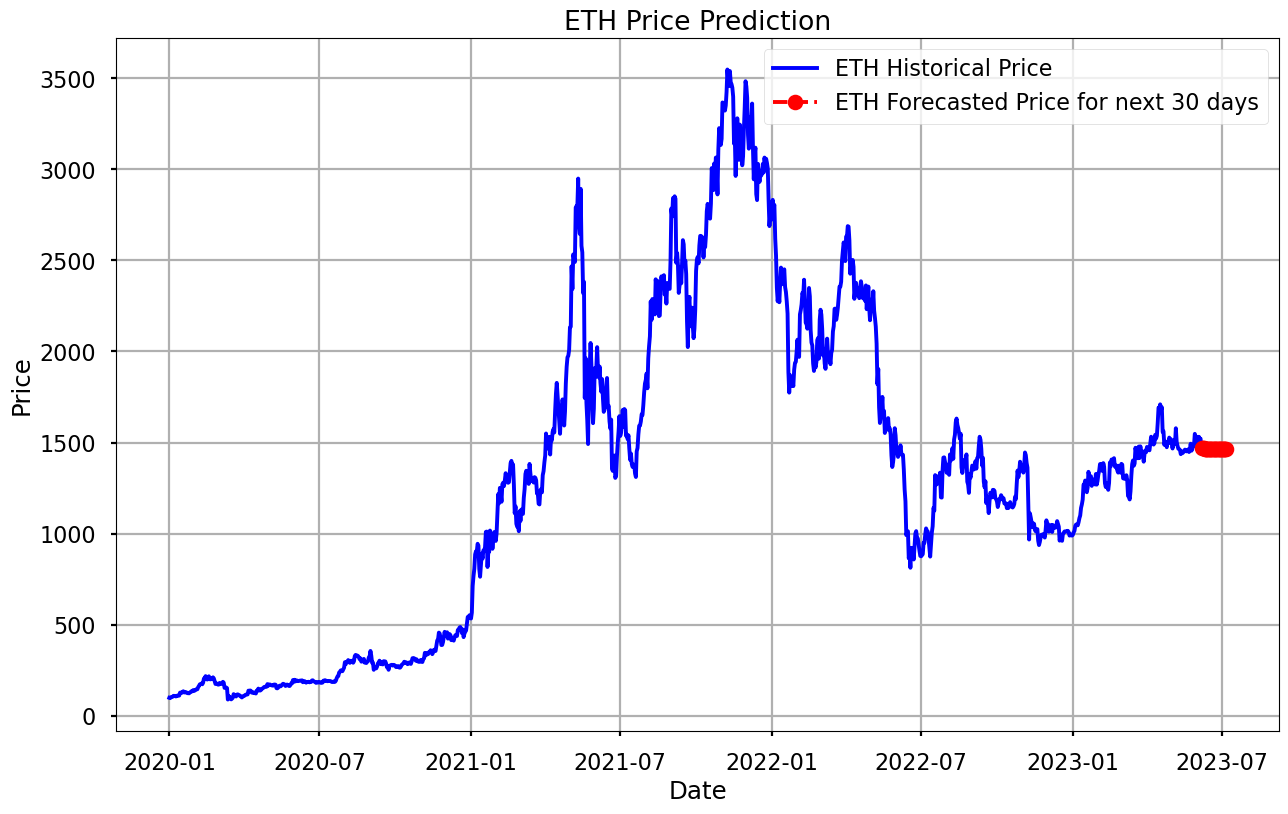

In [59]:
# Plotting the forecasted values along with the historical data

plt.figure(figsize=(15,9))
plt.grid(True)

# Plotting the historical data
plt.plot(merged_data_corrected .index, merged_data_corrected ['Adj Close'], color='blue', label='ETH Historical Price')

# Plotting the forecasted values
plt.plot(forecast_dates, forecasted_values, color='red', marker='o', linestyle='dashed', label='ETH Forecasted Price for next 30 days')

plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Extracting the 'Volume' data
volume_data = data['Volume'].values

# Splitting the volume data for training (using the same split as before)
train_volume = volume_data[:to_row]

# Training the ARIMAX model on the entire dataset with the best parameters and volume as exogenous variable
model_arimax = SARIMAX(entire_data, exog=volume_data, order=best_order)
model_arimax_fit = model_arimax.fit()

# Forecasting the next 30 days using the best parameters and volume as exogenous variable
forecast_output_arimax = model_arimax_fit.forecast(steps=forecast_days, exog=volume_data[-forecast_days:])

# Extracting the forecasted values
forecasted_values_arimax = forecast_output_arimax

# Plotting the forecasted values along with the historical data
plt.figure(figsize=(15,9))
plt.grid(True)

# Plotting the historical data
plt.plot(data.index, data['Adj Close'], color='blue', label='ETH Historical Price')

# Plotting the ARIMAX forecasted values
plt.plot(forecast_dates, forecasted_values_arimax, color='red', marker='o', linestyle='dashed', label='ETH ARIMAX Forecasted Price for next 30 days')

plt.title('ETH Price Prediction with ARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Importing necessary libraries and re-loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Re-loading the data
data_path = "ETH-GBP.csv"
data = pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extracting 'Adj Close' and 'Volume' data
entire_data = list(data['Adj Close'])
volume_data = data['Volume'].values

# Splitting the data for training and test (using the same split as before)
to_row = int(len(data) * 0.9)
training_data = list(data['Adj Close'][:to_row])
train_volume = volume_data[:to_row]

# Defining the best ARIMA parameters identified earlier
best_order = (2, 1, 2)

# Training the ARIMAX model on the training data with the best parameters and volume as exogenous variable
model_arimax_train = SARIMAX(training_data, exog=train_volume, order=best_order)
model_arimax_fit_train = model_arimax_train.fit()

# Forecasting the next 30 days using the best parameters and volume as exogenous variable for the entire data
forecast_output_arimax_train = model_arimax_fit_train.forecast(steps=forecast_days, exog=volume_data[-forecast_days:])

# Extracting the forecasted values
forecasted_values_arimax_train = forecast_output_arimax_train

# Plotting the forecasted values along with the historical data
plt.figure(figsize=(15,9))
plt.grid(True)

# Plotting the historical data
plt.plot(data.index, data['Adj Close'], color='blue', label='ETH Historical Price')

# Plotting the ARIMAX forecasted values
plt.plot(forecast_dates, forecasted_values_arimax_train, color='red', marker='o', linestyle='dashed', label='ETH ARIMAX Forecasted Price for next 30 days')

plt.title('ETH Price Prediction with ARIMAX (Using Training Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Loading the new data file
new_data = pd.read_csv("ETH_new.csv")
new_data.head()


In [ ]:

# Converting the 'timestamp' column to datetime format without specifying the unit
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'])

# Setting 'timestamp' as the index
new_data.set_index('timestamp', inplace=True)

# Displaying the first few rows of the processed data
new_data.head()


In [ ]:
# Checking the time range of the original and new datasets
original_data_range = (data.index.min(), data.index.max())
new_data_range = (new_data.index.min(), new_data.index.max())

original_data_range, new_data_range


In [ ]:
# Removing timezone information from the new data's index
new_data.index = new_data.index.tz_localize(None)

# Aligning the datasets again
aligned_data = data.merge(new_data, left_index=True, right_index=True, how='inner')

# Checking the first few rows of the aligned data
aligned_data.head()


In [ ]:
# Redefining the forecast date range
forecast_date_range_exog = pd.date_range(aligned_data.index[to_row_aligned-1], periods=forecast_days+1, closed='right')


# Forecasting the next 5 data points again
forecast_output_arimax_exog = model_arimax_fit_exog.forecast(steps=forecast_days, exog=aligned_data[['open', 'high', 'low', 'volume', 'marketCap']][-forecast_days:])
forecasted_values_arimax_exog = forecast_output_arimax_exog

# Plotting the forecasted values along with the historical data
plt.figure(figsize=(15,9))
plt.grid(True)

# Plotting the historical training data
plt.plot(aligned_data.index[:to_row_aligned], training_data_aligned, color='blue', label='ETH Historical Price')

# Plotting the ARIMAX forecasted values
plt.plot(forecast_date_range_exog, forecasted_values_arimax_exog, color='red', marker='o', linestyle='dashed', label='ETH ARIMAX Forecasted Price for next 35 days')

plt.title('ETH Price Prediction with ARIMAX Using Additional Features')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Redefining the forecast date range
forecast_date_range_full = pd.date_range(aligned_data.index[-1], periods=forecast_days_full+1, closed='right')

# Plotting the forecasted values along with the historical data again
plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(aligned_data.index, price_data, color='blue', label='ETH Historical Price')
plt.plot(forecast_date_range_full, forecasted_values_arimax_full, color='red', marker='o', linestyle='dashed', label='ETH ARIMAX Forecasted Price for next 180 days')
plt.title('ETH Price Prediction with ARIMAX Using Additional Features for 180 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
